In [218]:
##importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go
import seaborn as sns
import itertools
from scipy import *
from scipy.signal import butter, filtfilt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.interpolate import lagrange
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.nonparametric.kernel_regression import KernelReg
from IPython.display import display
from collections import defaultdict
import datetime
import math
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.font_manager as font_manager
from matplotlib import rc
import shutil
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
from matplotlib.lines import Line2D
import requests
from bs4 import BeautifulSoup
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import json
from io import StringIO

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, f1_score, make_scorer, classification_report
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from numpy import mean, std

In [4]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel, RandomSearch
from keras_tuner.tuners import Hyperband
import os
import shutil

In [5]:
import pickle
import shap

# TRAINING DATA PREPROCESSING

In [6]:
a = pd.read_csv("GSE28146.csv", header=None)
b = pd.read_csv("GSE48350.csv", header=None)
c = pd.read_csv("GSE1297.csv", header=None)

/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/3741068419.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  a = pd.read_csv("GSE28146.csv", header=None)
/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/3741068419.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174

In [7]:
a

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,ID_REF,GSM697308,GSM697309,GSM697310,GSM697311,GSM697312,GSM697313,GSM697314,GSM697315,GSM697316,...,GSM697328,GSM697329,GSM697330,GSM697331,GSM697332,GSM697333,GSM697334,GSM697335,GSM697336,GSM697337
1,1007_s_at,1752.5,986.7,1398.1,1107.1,2420.2,456.6,347.5,963.8,1884.8,...,2381.6,1203.5,1342.2,2877.2,2034.2,1539.2,1605.3,2890.6,4663,1995.4
2,1053_at,50.5,9.4,24.8,119.9,64.4,139.6,28.9,107.5,18.9,...,120.4,20.2,32.9,159.6,282.4,165.6,8.9,17,42.3,35.1
3,117_at,174.1,139.2,1347.6,203.3,368.8,155.6,266.8,187.9,98.5,...,344.9,622.9,279.5,273.4,5792.4,252,612.2,291,300,179.3
4,121_at,810.1,496.3,228.7,619.1,202.5,477.2,154.6,247.5,352.6,...,228.4,717.9,194,410.5,606.5,441.9,427.1,438,324.9,242.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54672,AFFX-ThrX-M_at,18.1,72.8,87.7,42.4,40.6,50.1,23.9,11.3,11.6,...,17.7,47.1,8.1,5.0,40.9,7.3,23.2,55.3,48.0,2.1
54673,AFFX-TrpnX-3_at,22.7,64.7,89.5,103.8,71.3,3.8,25.8,45.0,67.0,...,24.0,85.7,20.1,29.4,85.6,17.7,63.3,174.7,104.4,13.1
54674,AFFX-TrpnX-5_at,80.9,94.5,98.9,35.9,96.2,22.6,27.0,108.0,14.3,...,21.3,9.1,20.6,72.3,17.1,107.5,35.3,81.1,35.2,48.8
54675,AFFX-TrpnX-M_at,19.9,66.5,107.1,13.2,585.6,59.2,106.3,71.8,91.5,...,15.7,48.1,28.9,71.9,11.6,10.1,71.1,15.4,105.4,102.2


In [8]:
a = a.transpose()

In [9]:
row_slice = a.iloc[0, 1:54676] 

In [10]:
row_slice

1              1007_s_at
2                1053_at
3                 117_at
4                 121_at
5              1255_g_at
              ...       
54671     AFFX-ThrX-5_at
54672     AFFX-ThrX-M_at
54673    AFFX-TrpnX-3_at
54674    AFFX-TrpnX-5_at
54675    AFFX-TrpnX-M_at
Name: 0, Length: 54675, dtype: object

In [11]:
column_slice = a.iloc[1:31, 0]

In [12]:
column_slice

1     GSM697308
2     GSM697309
3     GSM697310
4     GSM697311
5     GSM697312
6     GSM697313
7     GSM697314
8     GSM697315
9     GSM697316
10    GSM697317
11    GSM697318
12    GSM697319
13    GSM697320
14    GSM697321
15    GSM697322
16    GSM697323
17    GSM697324
18    GSM697325
19    GSM697326
20    GSM697327
21    GSM697328
22    GSM697329
23    GSM697330
24    GSM697331
25    GSM697332
26    GSM697333
27    GSM697334
28    GSM697335
29    GSM697336
30    GSM697337
Name: 0, dtype: object

In [13]:
a = a.drop(a.columns[0], axis=1) 

In [14]:
a = a.drop(a.index[0])

In [15]:
a.index = column_slice

In [16]:
row_slice.to_csv('probe_a.csv', index=False)

In [17]:
a.columns = a.columns.astype(int)

In [ ]:
# a.columns = row_slice

In [18]:
b

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,ID_REF,GSM300166,GSM300167,GSM300168,GSM300169,GSM300170,GSM300171,GSM300172,GSM300173,GSM300174,...,GSM1176266,GSM1176267,GSM1176268,GSM1176269,GSM1176270,GSM1176271,GSM1176272,GSM1176273,GSM1176274,GSM1176275
1,1007_s_at,0.88801616,1.4355185,1.6096015,1.7549602,1.82073,1.439672,1.5876412,0.52471024,0.79657006,...,1.0286504,0.7742856,1.337073,1.2449067,2.087099,0.95986164,1.4419134,0.90462446,0.6691723,0.71399885
2,1053_at,0.6664604,0.8858521,1.8590777,1.0366664,1.421393,1.4850354,1.1862923,0.8766241,0.91771597,...,1.0447342,0.7894049,0.83870715,0.8256752,1.0045998,0.93611705,1,0.83475804,1.1221228,1.2028491
3,117_at,0.8596384,1.0620298,3.0973945,2.2436552,5.0603013,13.800817,2.211287,0.824494,1.6506448,...,0.93145084,1.9034239,1.4522284,1.5489688,1.0649894,0.9482248,0.8252233,1.0813574,1.4899012,1.4769499
4,121_at,0.9751495,1.0507448,0.9822838,1.1982367,1.0395293,0.781454,1.0119104,1.1515149,0.960083,...,0.98056513,1.1529822,1,0.59464544,1.0243831,1.1400663,0.57793105,1.156676,0.8612242,1.1281321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54672,AFFX-ThrX-M_at,2.192651,1.359484,0.366406,0.838871,1.713091,0.45248,0.723057,1.559647,3.8117,...,0.133477,0.985068,3.494374,0.650267,0.175214,0.283711,0.519934,0.337118,0.214913,0.431901
54673,AFFX-TrpnX-3_at,0.856374,0.788133,0.27637,0.263226,0.269487,0.260685,0.305559,0.773602,0.721354,...,0.825434,0.80611,0.877495,0.751681,0.775395,0.814601,0.715437,0.835289,0.729825,0.842679
54674,AFFX-TrpnX-5_at,0.56437,0.603353,0.229748,0.216288,0.228124,0.217972,0.252837,0.539272,0.498668,...,0.640491,0.636554,0.657589,0.593381,0.624309,0.627501,0.602891,0.641888,0.585794,0.649461
54675,AFFX-TrpnX-M_at,0.700505,0.729351,0.269485,0.254936,0.269396,0.250621,0.294936,0.684576,0.64182,...,0.764792,0.758366,0.775016,0.698267,0.724112,0.757383,0.664321,0.775862,0.674032,0.784179


In [19]:
b = b.transpose()

In [20]:
row_slice2 = b.iloc[0, 1:54676] 

In [21]:
row_slice2

1              1007_s_at
2                1053_at
3                 117_at
4                 121_at
5              1255_g_at
              ...       
54671     AFFX-ThrX-5_at
54672     AFFX-ThrX-M_at
54673    AFFX-TrpnX-3_at
54674    AFFX-TrpnX-5_at
54675    AFFX-TrpnX-M_at
Name: 0, Length: 54675, dtype: object

In [22]:
column_slice = b.iloc[1:254, 0]

In [23]:
column_slice

1       GSM300166
2       GSM300167
3       GSM300168
4       GSM300169
5       GSM300170
          ...    
249    GSM1176271
250    GSM1176272
251    GSM1176273
252    GSM1176274
253    GSM1176275
Name: 0, Length: 253, dtype: object

In [24]:
b = b.drop(b.columns[0], axis=1) 

In [25]:
b = b.drop(b.index[0])

In [26]:
b.index = column_slice

In [27]:
row_slice2.to_csv('probe_b.csv', index=False)

In [28]:
b.columns = b.columns.astype(int)

In [ ]:
# b.columns = row_slice

In [29]:
identical = row_slice.equals(row_slice2)

In [30]:
identical 

True

In [31]:
c = pd.read_csv("GSE1297.csv", header=None)

/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/3770251499.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  c = pd.read_csv("GSE1297.csv", header=None)


In [32]:
c = c.transpose()

In [42]:
c

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,LABEL
0,,,,,,,,,,,,,,,,,,,,,
GSM21203,6141.2,105.5,92,1105.5,221.4,493.6,363.9,24.4,27.8,95.3,...,157.6,67240.6,57578.1,24.8,10.6,91.4,69.6,23.5,63.1,1.0
GSM21204,4897,15.6,114.2,1475.3,156.7,439.9,225.5,60.4,11.9,118.2,...,85.9,36791.3,29695.3,17.9,43.0,16.1,3.7,4.9,7.9,1.0
GSM21205,6608,19.5,363.4,2273.9,316.9,1025.1,269.7,22.5,38.4,66.1,...,51.5,51764.4,57284.7,46.6,23.7,24.8,9.9,101.1,22.8,1.0
GSM21206,4533.3,145,6045.3,1237.8,77.4,178.6,236.3,113.8,9.9,81.4,...,59.0,26938.2,27815.3,9.2,33.2,29.1,13.8,5.4,3.2,1.0
GSM21207,9341.1,23.3,262.5,2538.4,134,450.1,265.1,47.2,15.1,156.2,...,124.2,101084.9,96958.6,25.7,29.3,12.3,65.8,10.0,19.0,1.0
GSM21208,5003.2,6.1,240.7,2055.6,202.4,419.3,401.4,35,26.7,142.5,...,126.1,39965.2,38015.7,22.9,19.8,131.0,17.1,98.0,16.1,1.0
GSM21209,8999.6,26.3,204.5,1843.8,179.7,490,224.6,24.8,15,128,...,74.9,46424.8,35371.0,13.5,20.2,45.7,16.0,6.1,8.5,1.0
GSM21210,4975.4,88.9,45.5,1325.4,152.1,365,120.1,16.9,7.2,130,...,78.4,34992.9,31127.5,8.9,16.3,31.5,4.7,10.3,2.2,1.0
GSM21211,4613.5,110.6,186.6,941.9,196.7,529.4,190.6,18.5,18.5,146.5,...,89.1,35723.2,42680.0,10.5,11.3,17.0,7.9,24.3,4.9,1.0


In [34]:
row_slice3 = c.iloc[0, 1:22285] 

In [35]:
row_slice3

1              1007_s_at
2                1053_at
3                 117_at
4                 121_at
5              1255_g_at
              ...       
22280     AFFX-ThrX-M_at
22281    AFFX-TrpnX-3_at
22282    AFFX-TrpnX-5_at
22283    AFFX-TrpnX-M_at
22284              LABEL
Name: 0, Length: 22284, dtype: object

In [36]:
column_slice = c.iloc[1:32, 0]

In [37]:
c = c.drop(c.columns[0], axis=1)

In [38]:
c = c.drop(c.index[0])

In [39]:
c.index = column_slice

In [40]:
c.columns = row_slice3

In [41]:
c.columns = c.columns.astype(str)

In [ ]:
# c.columns = row_slice

In [43]:
common_elements = row_slice[row_slice.isin(row_slice3)]

In [44]:
common_probe = pd.Series(common_elements)

In [45]:
common_probe

1              1007_s_at
2                1053_at
3                 117_at
4                 121_at
5              1255_g_at
              ...       
54671     AFFX-ThrX-5_at
54672     AFFX-ThrX-M_at
54673    AFFX-TrpnX-3_at
54674    AFFX-TrpnX-5_at
54675    AFFX-TrpnX-M_at
Name: 0, Length: 22277, dtype: object

In [46]:
common_probe_df = common_probe.to_frame(name='probe id')

In [47]:
common_probe_df

,probe id
1,1007_s_at
2,1053_at
3,117_at
4,121_at
5,1255_g_at
...,...
54671,AFFX-ThrX-5_at
54672,AFFX-ThrX-M_at
54673,AFFX-TrpnX-3_at
54674,AFFX-TrpnX-5_at


In [48]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(common_probe_df)

                          probe id
1                        1007_s_at
2                          1053_at
3                           117_at
4                           121_at
5                        1255_g_at
6                          1294_at
7                          1316_at
8                          1320_at
9                        1405_i_at
10                         1431_at
11                         1438_at
12                         1487_at
13                       1494_f_at
9935                     1598_g_at
9936                     160020_at
9937                       1729_at
9938                       1773_at
9939                        177_at
9940                        179_at
9941                       1861_at
9942                   200000_s_at
9943                     200001_at
9944                     200002_at
9945                   200003_s_at
9946                     200004_at
9947                     200005_at
9948                     200006_at
9949                

In [49]:
common_probe_df = common_probe_df.reset_index()

In [50]:
common_probe_df.to_csv('common_probe_df.csv', index=False)

# R Script file for converting "common_probe_df.csv" into "common_probe_to geneid.csv" is named "probe_id_to_gene.R". I have submitted it as well.

In [51]:
# importing dataframe where probe IDs correspond to gene IDs, processed in R
common_probe_to_geneid = pd.read_csv("common_probe_to_geneid.csv", header=None)

In [52]:
common_probe_to_geneid 

,0,1,2
0,index,probe.id,gene.id
1,1,1007_s_at,DDR1
2,2,1053_at,RFC2
3,3,117_at,HSPA6
4,4,121_at,PAX8
...,...,...,...
21052,54632,AFFX-HUMGAPDH/M33197_M_at,GAPDH
21053,54633,AFFX-HUMISGF3A/M97935_3_at,STAT1
21054,54634,AFFX-HUMISGF3A/M97935_5_at,STAT1
21055,54635,AFFX-HUMISGF3A/M97935_MA_at,STAT1


In [53]:
header = common_probe_to_geneid.iloc[0, 0:3] 

In [54]:
common_probe_to_geneid.columns = header

In [55]:
common_probe_to_geneid = common_probe_to_geneid.drop(common_probe_to_geneid.index[0])

In [56]:
common_probe_to_geneid['index'] = common_probe_to_geneid['index'].astype(int)

In [57]:
common_probe_to_geneid['probe.id'] = common_probe_to_geneid['probe.id'].astype(str)

In [58]:
common_probe_to_geneid['gene.id'] = common_probe_to_geneid['gene.id'].astype(str)

In [59]:
# Create a dictionary for mapping from 'index' to 'gene.id'
index_to_geneid_map = pd.Series(common_probe_to_geneid['gene.id'].values, index=common_probe_to_geneid['index']).to_dict()

# Filter the columns of 'a' (excluding the last column) and simultaneously rename them
filtered_and_renamed_a = a.iloc[:, :-1].loc[:, a.columns[:-1].intersection(index_to_geneid_map.keys())].rename(columns=index_to_geneid_map)

# Now, append the last column of 'a' to the 'filtered_and_renamed_a' DataFrame
filtered_and_renamed_a[a.columns[-1]] = a.iloc[:, -1]

# Ensure the resulting DataFrame has the expected number of columns (21056 + 1 for the last column)
expected_columns = 21056 + 1  # Adding 1 for the last column
assert filtered_and_renamed_a.shape[1] == expected_columns, f"The DataFrame does not contain the expected number of columns ({expected_columns})."

print(filtered_and_renamed_a.shape)

(30, 21057)


In [66]:
filtered_and_renamed_a

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,...,ACTB,ACTB,GAPDH,GAPDH,GAPDH,STAT1,STAT1,STAT1,STAT1,LABEL
0,,,,,,,,,,,,,,,,,,,,,
GSM697308,1752.5,50.5,174.1,810.1,688.8,400.6,958.5,135.1,70.4,21.4,...,2147.3,1459.9,2896.8,2920.2,1091.8,578.2,451.0,107.9,1136.7,0.0
GSM697309,986.7,9.4,139.2,496.3,352.1,173.7,918.9,29.3,49.7,63.3,...,2403.3,2086.2,5304.6,4271.0,1319.5,707.1,353.5,371.5,1339.9,0.0
GSM697310,1398.1,24.8,1347.6,228.7,106.3,349,531.2,61.3,47.3,17.4,...,3010.4,1774.9,3321.5,3278.2,1323.1,533.3,329.0,772.4,1121.7,0.0
GSM697311,1107.1,119.9,203.3,619.1,288.4,49.7,1314.2,115.8,5.4,54.5,...,4016.8,2260.1,6553.8,2708.5,802.6,468.7,423.5,213.2,1116.9,0.0
GSM697312,2420.2,64.4,368.8,202.5,416.9,175.7,889.5,34.8,36.2,44.5,...,2828.3,1309.0,3819.8,2240.8,661.7,388.5,535.2,75.3,965.5,0.0
GSM697313,456.6,139.6,155.6,477.2,488.8,313.3,615.7,173.8,6.9,156.2,...,2056.1,1515.8,4827.8,3513.2,926.9,905.8,295.0,371.8,1296.1,0.0
GSM697314,347.5,28.9,266.8,154.6,332.9,249.6,1394.6,267.2,7.9,121.7,...,2553.2,1480.0,5454.2,3709.0,1051.7,826.1,294.1,168.0,655.8,0.0
GSM697315,963.8,107.5,187.9,247.5,89.5,40.2,849.3,297.2,49.4,88.3,...,2631.3,1514.4,5650.7,5870.2,1517.9,850.1,224.6,351.8,845.9,0.0
GSM697316,1884.8,18.9,98.5,352.6,222,263.9,676,29.2,16.4,115.3,...,2948.7,1619.4,4294.3,3288.0,1230.3,708.2,263.6,370.6,954.7,1.0


In [61]:
filtered_and_renamed_a.columns = filtered_and_renamed_a.columns[:-1].tolist() + ["LABEL"]

In [62]:
# Create a dictionary for mapping from 'index' to 'gene.id'
index_to_geneid_map = pd.Series(common_probe_to_geneid['gene.id'].values, index=common_probe_to_geneid['index']).to_dict()

# Filter the columns of 'b' (excluding the last column) and simultaneously rename them
filtered_and_renamed_b = b.iloc[:, :-1].loc[:, b.columns[:-1].intersection(index_to_geneid_map.keys())].rename(columns=index_to_geneid_map)

# Now, append the last column of 'b' to the 'filtered_and_renamed_b' DataFrame
filtered_and_renamed_b[b.columns[-1]] = b.iloc[:, -1]

# Ensure the resulting DataFrame has the expected number of columns (21056 + 1 for the last column)
expected_columns = 21056 + 1  # Adding 1 for the last column
assert filtered_and_renamed_b.shape[1] == expected_columns, f"The DataFrame does not contain the expected number of columns ({expected_columns})."

print(filtered_and_renamed_b.shape)

# Rename the last column to "LABEL"
filtered_and_renamed_b.columns = filtered_and_renamed_b.columns[:-1].tolist() + ["LABEL"]

(253, 21057)


In [63]:
filtered_and_renamed_b

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,...,ACTB,ACTB,GAPDH,GAPDH,GAPDH,STAT1,STAT1,STAT1,STAT1,LABEL
0,,,,,,,,,,,,,,,,,,,,,
GSM300166,0.88801616,0.6664604,0.8596384,0.9751495,0.49125472,0.8344268,1.6511366,0.9306214,1.5584053,1.2632518,...,0.444833,0.492691,0.960952,0.781391,0.778564,0.705683,0.718535,0.464223,0.409775,0.0
GSM300167,1.4355185,0.8858521,1.0620298,1.0507448,0.5375254,0.929189,1.0135372,0.7651289,0.82681346,0.8641548,...,0.502593,0.636189,0.943167,0.691913,0.775484,0.808681,0.598945,0.468806,0.406751,0.0
GSM300168,1.6096015,1.8590777,3.0973945,0.9822838,3.1796446,1.5193694,0.580581,0.49654773,1.7416698,2.7461865,...,0.839579,0.890037,0.777542,0.921921,0.872492,1.084162,0.252827,0.590908,1.113621,0.0
GSM300169,1.7549602,1.0366664,2.2436552,1.1982367,1.5142903,1.5570885,0.60882705,0.4568232,1.1630075,1.7315621,...,0.591543,0.657905,0.74294,0.790309,0.751138,0.779693,0.224534,0.268815,0.544417,0.0
GSM300170,1.82073,1.421393,5.0603013,1.0395293,2.185801,1.6412625,0.724664,0.38591293,0.9058549,1.7711152,...,0.689359,0.779986,0.835985,0.8989,0.876726,0.904319,0.172766,0.132401,0.312136,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1176271,0.95986164,0.93611705,0.9482248,1.1400663,0.54874235,0.92174345,0.931321,0.96288973,0.8985344,0.8823983,...,0.919768,1.0,1.029165,0.945628,1.030684,0.946904,0.666199,0.771837,0.71292,1.0
GSM1176272,1.4419134,1,0.8252233,0.57793105,0.45806673,1.106869,0.83515215,1.1760111,0.695985,1.0096756,...,0.87327,0.990153,0.840236,0.811805,0.931567,1.072119,0.703217,1.0,1.130516,1.0
GSM1176273,0.90462446,0.83475804,1.0813574,1.156676,0.552341,1.0624748,0.95998967,0.86723256,0.8986595,0.67819995,...,0.750034,0.882227,0.879046,0.808368,0.859414,0.709275,0.597034,0.601323,0.445604,1.0


In [64]:
# Create a dictionary for mapping from 'probe.id' to 'gene.id'
probe_to_geneid_map = pd.Series(common_probe_to_geneid['gene.id'].values, index=common_probe_to_geneid['probe.id']).to_dict()

# Prepare a list to collect columns to be dropped
columns_to_drop = []

# Iterate over the column headers of 'c' except the last one
for col in c.columns[:-1]:  # Exclude the last column from this process
    if col in probe_to_geneid_map:
        # If the column header matches a 'probe.id', rename it to the corresponding 'gene.id'
        c.rename(columns={col: probe_to_geneid_map[col]}, inplace=True)
    else:
        # If there is no match, mark the column for dropping
        columns_to_drop.append(col)

# Drop the columns that didn't match any 'probe.id'
c.drop(columns=columns_to_drop, inplace=True)

# Append the last column of 'c' (now the only column not yet processed) to the DataFrame
# Note: This step may not be necessary if the last column is already correctly positioned and named,
# but if you need to ensure it's kept and renamed to "LABEL", you can explicitly rename it as follows:
c.rename(columns={c.columns[-1]: "LABEL"}, inplace=True)

# Ensure the resulting DataFrame has the expected number of columns (21056 columns + 1 for the last column)
expected_columns = 21056 + 1  # Adding 1 for the last column, now renamed to "LABEL"
assert c.shape[1] == expected_columns, f"The DataFrame does not contain the expected number of columns ({expected_columns})."

print(c.shape)

(31, 21057)


In [68]:
c

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,...,ACTB,ACTB,GAPDH,GAPDH,GAPDH,STAT1,STAT1,STAT1,STAT1,LABEL
0,,,,,,,,,,,,,,,,,,,,,
GSM21203,6141.2,105.5,92,1105.5,221.4,493.6,363.9,24.4,27.8,95.3,...,576.9,1053.9,19353.0,1844.6,4720.5,2865.5,64.9,57.3,179.2,1.0
GSM21204,4897,15.6,114.2,1475.3,156.7,439.9,225.5,60.4,11.9,118.2,...,1308.5,1825.4,14379.1,1536.0,4035.0,790.5,6.6,72.7,72.8,1.0
GSM21205,6608,19.5,363.4,2273.9,316.9,1025.1,269.7,22.5,38.4,66.1,...,1334.9,2524.3,28207.5,3917.8,9601.5,749.6,7.8,83.1,32.7,1.0
GSM21206,4533.3,145,6045.3,1237.8,77.4,178.6,236.3,113.8,9.9,81.4,...,4692.9,7559.2,16689.7,12473.0,11867.4,857.9,11.4,25.1,94.1,1.0
GSM21207,9341.1,23.3,262.5,2538.4,134,450.1,265.1,47.2,15.1,156.2,...,995.0,1757.1,17839.0,3184.0,3779.4,398.6,22.5,59.5,177.7,1.0
GSM21208,5003.2,6.1,240.7,2055.6,202.4,419.3,401.4,35,26.7,142.5,...,795.1,1466.1,16489.8,2300.4,5348.6,950.8,85.1,120.4,177.3,1.0
GSM21209,8999.6,26.3,204.5,1843.8,179.7,490,224.6,24.8,15,128,...,2266.7,6343.7,23783.4,5033.6,8741.2,874.9,35.8,41.5,62.8,1.0
GSM21210,4975.4,88.9,45.5,1325.4,152.1,365,120.1,16.9,7.2,130,...,4846.6,10070.1,20304.2,9225.0,10959.7,1129.0,13.1,42.7,109.1,1.0
GSM21211,4613.5,110.6,186.6,941.9,196.7,529.4,190.6,18.5,18.5,146.5,...,1928.5,4298.8,20978.4,7035.0,8658.2,799.8,11.6,39.9,86.2,1.0


In [69]:
for column in filtered_and_renamed_a.columns[:-1]:
    filtered_and_renamed_a[column] = filtered_and_renamed_a[column].astype(float)

In [70]:
for column in filtered_and_renamed_b.columns[:-1]:
    filtered_and_renamed_b[column] = filtered_and_renamed_b[column].astype(float)

In [71]:
for column in c.columns[:-1]:
    c[column] = c[column].astype(float)

In [72]:
last_col = filtered_and_renamed_a.iloc[:, -1]  # Store the last column
df_without_last = filtered_and_renamed_a.iloc[:, :-1]  # All columns except the last


df_log2_transformed = np.log2(df_without_last + 1)


filtered_and_renamed_a = pd.concat([df_log2_transformed, last_col], axis=1)

In [73]:
filtered_and_renamed_a

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,...,ACTB,ACTB,GAPDH,GAPDH,GAPDH,STAT1,STAT1,STAT1,STAT1,LABEL
0,,,,,,,,,,,,,,,,,,,,,
GSM697308,10.776022,5.686501,7.452035,9.663736,9.430034,8.649615,9.906139,7.088523,6.157852,4.485427,...,11.068980,10.512642,11.500742,11.512345,10.093814,9.177918,8.820179,6.766860,10.151904,0.0
GSM697309,9.947929,3.378512,7.131343,8.957973,8.463933,7.448736,9.845333,4.921246,5.663914,6.006747,...,11.231401,11.027353,12.373300,12.060696,10.366869,9.467809,8.469642,8.541097,10.388986,0.0
GSM697310,10.450283,4.689299,10.397247,7.843607,6.745506,8.451211,9.055825,5.961160,5.593951,4.201634,...,11.556219,10.794335,11.698053,11.679128,10.370796,9.061506,8.366322,9.595071,10.132757,0.0
GSM697311,10.113872,6.917670,7.674545,9.276357,8.176921,5.663914,10.361066,6.867896,2.678072,5.794416,...,11.972190,11.142809,12.678336,11.403811,9.650334,8.875596,8.729621,7.742815,10.126575,0.0
GSM697312,11.241507,6.031219,8.530601,7.668885,8.707014,7.465158,9.798472,5.161888,5.217231,5.507795,...,11.466229,10.355351,11.899659,11.130442,9.372212,8.605480,9.066627,6.253611,9.916626,0.0
GSM697313,8.837943,7.135453,7.290940,8.901470,8.936049,8.295998,9.268425,7.449561,2.981853,7.296457,...,11.006396,10.566815,12.237449,11.778981,9.857826,9.824641,8.209453,8.542258,10.341074,0.0
GSM697314,8.445015,4.902074,8.065012,7.281698,8.383272,7.969243,10.446670,8.067165,3.153805,6.938991,...,11.318656,10.532356,12.413416,11.857203,10.039879,9.691918,8.205060,7.400879,9.359310,0.0
GSM697315,9.914086,6.761551,7.561479,7.957102,6.499846,5.364572,9.731828,8.220136,5.655352,6.480588,...,11.362108,10.565483,12.464469,12.519440,10.568811,9.733185,7.817623,8.462707,9.726048,0.0
GSM697316,10.880961,4.314697,6.636625,8.465974,7.800900,8.049304,9.403012,4.916477,4.121015,6.861707,...,11.526353,10.662134,12.068543,11.683433,10.265967,9.470049,8.047669,8.537607,9.900414,1.0


In [74]:
last_col = c.iloc[:, -1]  # Store the last column
df_without_last = c.iloc[:, :-1]  # All columns except the last


df_log2_transformed = np.log2(df_without_last + 1)


c = pd.concat([df_log2_transformed, last_col], axis=1)

In [75]:
c

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,...,ACTB,ACTB,GAPDH,GAPDH,GAPDH,STAT1,STAT1,STAT1,STAT1,LABEL
0,,,,,,,,,,,,,,,,,,,,,
GSM21203,12.584540,6.734710,6.539159,10.111788,7.797013,8.950118,8.511357,4.666757,4.847997,6.589464,...,9.174676,10.042891,14.240344,10.849874,12.205030,11.485075,6.042207,5.865424,7.493455,1.0
GSM21204,12.257977,4.053111,6.847997,10.527770,7.301039,8.784308,7.823367,5.940167,3.689299,6.897240,...,10.354800,10.834787,13.811786,10.585901,11.978710,9.628446,2.925999,6.203593,6.205549,1.0
GSM21205,12.690216,4.357552,8.509379,11.151587,8.312429,10.002956,8.080551,4.554589,5.300124,6.068241,...,10.383596,11.302239,14.783842,11.936196,13.229194,9.551900,3.137504,6.394034,5.074677,1.0
GSM21206,12.146664,7.189825,12.561837,10.274728,6.292782,7.488644,7.890568,6.842979,3.446256,6.364572,...,12.196571,12.884209,14.026757,13.606637,13.534838,9.746346,3.632268,4.705978,6.571373,1.0
GSM21207,13.189531,4.602884,8.041659,11.310272,7.076816,8.817303,8.055825,5.590961,4.008989,7.296457,...,9.960002,10.779801,14.122828,11.637078,11.884323,8.642413,4.554589,5.918863,7.481396,1.0
GSM21208,12.288924,2.827819,7.917074,11.006046,7.668176,8.715276,8.652486,5.169925,4.791814,7.164907,...,9.636806,10.518751,14.009374,11.168296,12.385215,9.894515,6.427941,6.923625,7.478163,1.0
GSM21209,13.135805,4.770829,7.682995,10.849249,7.497453,8.939579,7.817623,4.689299,4.000000,7.011227,...,11.147014,12.631336,14.537728,12.297661,13.093781,9.774622,5.201634,5.409391,5.995485,1.0
GSM21210,12.280887,6.490249,5.539159,10.373300,7.258330,8.515700,6.920055,4.161888,3.035624,7.033423,...,12.243055,13.297934,14.309562,13.171490,13.420052,10.142107,3.817623,5.449561,6.782671,1.0
GSM21211,12.171959,6.802193,7.551516,9.880961,7.627169,9.050937,7.581954,4.285402,4.285402,7.204571,...,10.914011,12.070054,14.356686,12.780540,13.080018,9.645298,3.655352,5.354029,6.446256,1.0


In [76]:
if len(filtered_and_renamed_a.columns) == len(filtered_and_renamed_b.columns) == len(c.columns):
    
    if (filtered_and_renamed_a.columns.equals(filtered_and_renamed_b.columns) and 
            filtered_and_renamed_b.columns.equals(c.columns)):
        
        train_df = pd.concat([filtered_and_renamed_a, filtered_and_renamed_b, c])
        
        print(train_df.shape)
    else:
        print("column headers are not identical.")
else:
    print("DataFrames don't have the same number of columns.")

(314, 21057)


In [77]:
train_df

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,...,ACTB,ACTB,GAPDH,GAPDH,GAPDH,STAT1,STAT1,STAT1,STAT1,LABEL
0,,,,,,,,,,,,,,,,,,,,,
GSM697308,10.776022,5.686501,7.452035,9.663736,9.430034,8.649615,9.906139,7.088523,6.157852,4.485427,...,11.068980,10.512642,11.500742,11.512345,10.093814,9.177918,8.820179,6.766860,10.151904,0.0
GSM697309,9.947929,3.378512,7.131343,8.957973,8.463933,7.448736,9.845333,4.921246,5.663914,6.006747,...,11.231401,11.027353,12.373300,12.060696,10.366869,9.467809,8.469642,8.541097,10.388986,0.0
GSM697310,10.450283,4.689299,10.397247,7.843607,6.745506,8.451211,9.055825,5.961160,5.593951,4.201634,...,11.556219,10.794335,11.698053,11.679128,10.370796,9.061506,8.366322,9.595071,10.132757,0.0
GSM697311,10.113872,6.917670,7.674545,9.276357,8.176921,5.663914,10.361066,6.867896,2.678072,5.794416,...,11.972190,11.142809,12.678336,11.403811,9.650334,8.875596,8.729621,7.742815,10.126575,0.0
GSM697312,11.241507,6.031219,8.530601,7.668885,8.707014,7.465158,9.798472,5.161888,5.217231,5.507795,...,11.466229,10.355351,11.899659,11.130442,9.372212,8.605480,9.066627,6.253611,9.916626,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM21229,11.832653,6.070389,7.442114,10.331701,6.409391,8.250298,7.243174,4.095924,2.887525,6.772150,...,12.998872,13.821644,14.006221,13.778714,13.658234,10.383596,5.669594,6.808642,7.608809,1.0
GSM21230,12.602281,5.842979,7.532161,10.359859,7.377644,8.849249,7.938991,5.189825,3.700440,6.592457,...,12.159745,12.891309,14.406046,12.928648,13.165504,9.895575,6.837943,5.104337,7.210428,1.0
GSM21231,12.187321,6.811214,6.452859,10.450180,6.921246,9.044121,7.354911,4.426265,3.733354,6.133399,...,13.117935,13.935635,14.473661,13.825933,13.947135,9.853154,5.778734,7.070389,7.123087,0.0


In [78]:
# Separate the last column from the rest of the DataFrame
last_col = train_df.iloc[:, -1]  # Store the last column
df_without_last = train_df.iloc[:, :-1]  # All columns except the last

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax scaling to all columns except the last
df_scaled = pd.DataFrame(scaler.fit_transform(df_without_last), 
                         columns=df_without_last.columns,
                         index=df_without_last.index)  # Preserve the original indices

# Concatenate the scaled data with the last column
train_df = pd.concat([df_scaled, last_col], axis=1)

In [79]:
train_df.reset_index(inplace=True)

In [80]:
train_df.rename(columns={0: 'patient ID'}, inplace=True)

In [81]:
print(train_df.shape)

(314, 21058)


In [82]:
# getting the Alzheimer's gene ID series as a JSON, from another jupyer notebook called project_wrangling
with open('series.json', 'r') as file:
    series_json = file.read()

In [83]:
ad_ID = pd.read_json(StringIO(series_json), typ='series')

In [84]:
ad_ID = ad_ID.astype(str)

In [85]:
ad_ID

0       CALM1
1       NSUN6
2       PSMB7
3       TEX10
4      ANP32B
        ...  
954       GEM
955       TRO
956      EMX2
957       PGP
958     NFAT5
Length: 959, dtype: object

In [86]:
are_all_elements_unique = ad_ID.is_unique

print("All elements are unique:" if are_all_elements_unique else "Not all elements are unique.")

All elements are unique:


In [87]:
# Convert ad_ID Series to a set for faster lookup
ad_ID_set = set(ad_ID)

# Identify columns to keep (excluding 'patient ID' and 'LABEL')
columns_to_keep = ['patient ID'] + [col for col in train_df.columns[1:-1] if col in ad_ID_set] + ['LABEL']

# Filter the DataFrame to include only the columns identified
train_df = train_df[columns_to_keep]

print(train_df.shape)

(314, 3377)


In [88]:
train_df

,patient ID,RPL24,RPL24,FAU,RPL19,SLC25A3,RPL6,CBX3,CBX3,DAD1,...,ZNF335,CX3CL1,CX3CL1,ACSM5,ACSM5,LRCH4,LRCH4,LRCH4,LRCH4,LABEL
0,GSM697308,0.881036,0.894201,0.716351,0.909843,0.836202,0.901251,0.927844,0.894238,0.735317,...,0.458324,0.429650,0.666719,0.484802,0.626441,0.887659,0.596980,0.631567,0.917413,0.0
1,GSM697309,0.906182,0.979816,0.798480,0.943659,0.973439,0.938178,0.911926,0.965837,0.769093,...,0.517185,0.539837,0.644518,0.816142,0.725441,0.828406,0.523282,0.578031,0.877206,0.0
2,GSM697310,0.894382,0.926999,0.736449,0.971210,0.973359,0.915359,0.895698,0.886365,0.759223,...,0.690436,0.620059,0.817051,0.669472,0.696347,0.725796,0.864007,0.887258,0.871356,0.0
3,GSM697311,0.869022,0.901864,0.724824,0.972053,0.725502,0.908067,0.955708,0.977368,0.694109,...,0.469205,0.541527,0.657309,0.518959,0.448608,0.805660,0.618196,0.593922,0.950645,0.0
4,GSM697312,0.869094,0.950182,0.753615,0.936762,0.864566,0.930555,0.843191,0.890787,0.838217,...,0.743278,0.459357,0.900360,0.814927,0.449641,0.552874,0.732530,0.571519,0.976886,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,GSM21229,0.995292,0.932183,0.977990,0.997698,0.970618,0.945186,0.966751,0.632977,0.962178,...,0.857005,0.946629,0.892725,0.842992,0.816072,0.728639,0.548298,0.689234,0.773331,1.0
310,GSM21230,0.966808,0.939721,0.954306,0.954516,0.906147,0.938409,0.929014,0.646130,0.925991,...,0.886921,0.774813,0.873975,0.880860,0.808564,0.867571,0.661343,0.841005,0.867661,1.0
311,GSM21231,0.963651,0.943827,0.983501,0.946681,0.952223,0.956818,0.892883,0.659935,0.979076,...,0.894406,0.985039,0.929084,0.825473,0.809917,0.845876,0.569627,0.707636,0.780468,0.0
312,GSM21232,0.961748,0.944056,0.962997,0.930072,0.876375,0.926830,0.959937,0.581458,0.893794,...,0.962627,0.832820,0.887437,0.899492,0.851542,0.841181,0.613522,0.653463,0.831750,0.0


In [89]:
unique_column_count = sum(train_df.columns.value_counts() == 1)
print(f"Unique columns before dropping: {unique_column_count}")

Unique columns before dropping: 565


In [90]:
header_counts = train_df.columns.value_counts()

repeated_headers = header_counts[header_counts > 1]

total_repeated_count = repeated_headers.sum()

print(f"TOTAL REPEATED HEADERS COUNT: {total_repeated_count}\n")

print("COLUMN\tCOUNT\tPOSITIONS")

for header, count in repeated_headers.items():
    
    positions = [str(idx) for idx, col_name in enumerate(train_df.columns) if col_name == header]
    
    positions_str = ", ".join(positions)
    
    print(f"{header}\t{count}\t{positions_str}")

TOTAL REPEATED HEADERS COUNT: 2812

COLUMN	COUNT	POSITIONS
PML	64	1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899
CALM1	49	32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2319, 2320, 2321, 2322, 2323, 2324, 2325
MACF1	36	1174, 1175, 1176, 1177, 1178, 1179, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 2513, 2514, 2515, 2516, 2517, 2518, 2577, 2578, 2579, 2580, 2581, 2582, 2587, 2588, 2589, 2590, 2591, 2592
PMS2P1	36	2463, 2464, 2465, 2466, 2467, 2468, 2498, 2

In [91]:
header_counts = train_df.columns.value_counts()

repeated_headers = header_counts[header_counts > 1]

repeated_headers_series = pd.Series(repeated_headers.index)

print(repeated_headers_series)

0         PML
1       CALM1
2       MACF1
3      PMS2P1
4      NAP1L1
        ...  
356     PHF14
357      COIL
358      MT1X
359     GGPS1
360     PSMD5
Length: 361, dtype: object


In [92]:
# Copy columns with repeated headers to a new DataFrame 'repeated'
repeated = train_df.loc[:, train_df.columns.isin(repeated_headers_series)].copy()

# Drop these columns from 'train_df', retaining only the unique headers
train_df = train_df.drop(columns=repeated.columns)

In [93]:
train_df

,patient ID,FAU,RPL19,SLC25A3,RPL6,DAD1,ATP6V0B,GOT2,PSMB7,CCT7,...,GNA12,EMX2,GNG3,P4HTM,WDR13,ACTR10,UBQLN4,EMC10,KCNE4,LABEL
0,GSM697308,0.716351,0.909843,0.836202,0.901251,0.735317,0.700797,0.861251,0.840427,0.860997,...,0.894708,0.942677,0.863365,0.754733,0.512970,0.853012,0.919505,0.757550,0.347395,0.0
1,GSM697309,0.798480,0.943659,0.973439,0.938178,0.769093,0.709223,0.883438,0.848642,0.773894,...,0.906056,0.953716,0.942207,0.758269,0.701897,0.976096,0.898570,0.911646,0.345444,0.0
2,GSM697310,0.736449,0.971210,0.973359,0.915359,0.759223,0.776132,0.886080,0.867207,0.811024,...,0.959866,0.906783,0.980855,0.809172,0.631301,0.873116,0.938949,0.912913,0.454861,0.0
3,GSM697311,0.724824,0.972053,0.725502,0.908067,0.694109,0.524203,0.773108,0.886123,0.924948,...,0.892148,0.793672,0.936589,0.674736,0.682287,0.819031,0.925904,0.986781,0.500622,0.0
4,GSM697312,0.753615,0.936762,0.864566,0.930555,0.838217,0.736109,0.797101,0.866379,0.900433,...,0.904722,0.886737,0.968552,0.769120,0.852656,0.904359,0.936926,0.916396,0.292008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,GSM21229,0.977990,0.997698,0.970618,0.945186,0.962178,1.000000,0.952297,1.000000,0.976475,...,0.711136,0.836281,0.896705,0.981313,0.864149,0.942701,0.603687,0.530035,0.383115,1.0
310,GSM21230,0.954306,0.954516,0.906147,0.938409,0.925991,0.908187,0.884662,0.874669,0.941459,...,0.791549,0.928849,0.776522,0.901482,0.901286,0.821257,0.760263,0.416629,0.517000,1.0
311,GSM21231,0.983501,0.946681,0.952223,0.956818,0.979076,0.978597,0.937688,0.946143,0.973847,...,0.718144,0.864761,0.843462,0.955754,0.968022,0.872761,0.636895,0.430404,0.527762,0.0
312,GSM21232,0.962997,0.930072,0.876375,0.926830,0.893794,0.931569,0.952656,0.897210,0.864541,...,0.750924,0.962485,0.834124,0.956398,0.943125,0.832294,0.747133,0.436025,0.500834,0.0


In [94]:
repeated

,RPL24,RPL24,CBX3,CBX3,SNX3,SNX3,SNX3,SNX3,GUK1,GUK1,...,ZNF335,ZNF335,CX3CL1,CX3CL1,ACSM5,ACSM5,LRCH4,LRCH4,LRCH4,LRCH4
0,0.881036,0.894201,0.927844,0.894238,0.845114,0.896574,0.904539,0.848805,0.829106,0.601014,...,0.775584,0.458324,0.429650,0.666719,0.484802,0.626441,0.887659,0.596980,0.631567,0.917413
1,0.906182,0.979816,0.911926,0.965837,0.960434,0.943987,0.950760,0.949017,0.841958,0.939202,...,0.484653,0.517185,0.539837,0.644518,0.816142,0.725441,0.828406,0.523282,0.578031,0.877206
2,0.894382,0.926999,0.895698,0.886365,0.863573,0.963367,0.893409,0.851510,0.848107,0.888090,...,0.756729,0.690436,0.620059,0.817051,0.669472,0.696347,0.725796,0.864007,0.887258,0.871356
3,0.869022,0.901864,0.955708,0.977368,0.921368,0.858170,0.928940,0.949782,0.835647,0.862104,...,0.826474,0.469205,0.541527,0.657309,0.518959,0.448608,0.805660,0.618196,0.593922,0.950645
4,0.869094,0.950182,0.843191,0.890787,0.909809,0.945079,0.882324,0.866784,0.753848,0.855536,...,0.629978,0.743278,0.459357,0.900360,0.814927,0.449641,0.552874,0.732530,0.571519,0.976886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.995292,0.932183,0.966751,0.632977,0.943649,0.891604,0.945912,0.940974,0.918645,0.608096,...,0.321000,0.857005,0.946629,0.892725,0.842992,0.816072,0.728639,0.548298,0.689234,0.773331
310,0.966808,0.939721,0.929014,0.646130,0.917359,0.874729,0.941307,0.894058,0.931279,0.688387,...,0.439454,0.886921,0.774813,0.873975,0.880860,0.808564,0.867571,0.661343,0.841005,0.867661
311,0.963651,0.943827,0.892883,0.659935,0.954137,0.900488,0.965566,0.936300,0.911525,0.660179,...,0.426396,0.894406,0.985039,0.929084,0.825473,0.809917,0.845876,0.569627,0.707636,0.780468
312,0.961748,0.944056,0.959937,0.581458,0.917982,0.854866,0.939508,0.893087,0.912930,0.585510,...,0.460796,0.962627,0.832820,0.887437,0.899492,0.851542,0.841181,0.613522,0.653463,0.831750


In [95]:
# Generate new column names for medians and add them as empty columns at the end of 'repeated'
for col_name in repeated_headers_series:
    median_col_name = col_name + "_median"
    repeated[median_col_name] = np.nan

/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/325062779.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  repeated[median_col_name] = np.nan
/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/325062779.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  repeated[median_col_name] = np.nan
/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/325062779.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

In [96]:
# For each of the repeated headers, calculate the median and fill the corresponding new column
for header in repeated_headers_series:
    # Identify all columns for the current header
    relevant_columns = repeated.filter(like=header).columns
    
    # Calculate the median for these columns row-wise
    median_values = repeated[relevant_columns].median(axis=1)
    
    # Assign the median values to the corresponding new column
    repeated[header + "_median"] = median_values

In [97]:
print(f"Updated 'train_df' shape: {train_df.shape}")  # Expected to have 565 columns
print(f"Updated 'repeated' shape: {repeated.shape}")  # Expected to have 2812 + 361 columns

Updated 'train_df' shape: (314, 565)
Updated 'repeated' shape: (314, 3173)


In [98]:
repeated_median_only = repeated.filter(like='_median')

print(f"Shape of 'repeated' with only median columns: {repeated_median_only.shape}")

Shape of 'repeated' with only median columns: (314, 361)


In [99]:
repeated_median_only

,PML_median,CALM1_median,MACF1_median,PMS2P1_median,NAP1L1_median,FUT6_median,GOLGA8A_median,SOX4_median,CDC14A_median,RHOQ_median,...,CDC40_median,SNX11_median,RSRC2_median,CFDP1_median,CX3CL1_median,PHF14_median,COIL_median,MT1X_median,GGPS1_median,PSMD5_median
0,0.638054,0.984691,0.838787,0.898879,0.933847,0.692016,0.889171,0.854209,0.713119,0.875372,...,0.689943,0.816296,0.938884,0.828645,0.548185,0.857555,0.791995,0.655879,0.717778,0.765206
1,0.526521,0.985191,0.869490,0.911854,0.942274,0.702967,0.919202,0.882067,0.539332,0.823750,...,0.804024,0.776268,0.893660,0.764875,0.592178,0.825417,0.883512,0.735065,0.790065,0.820061
2,0.554371,0.983600,0.908343,0.912119,0.917457,0.765419,0.952594,0.821336,0.773627,0.846555,...,0.865469,0.897787,0.923647,0.666096,0.718555,0.901774,0.733609,0.685758,0.835165,0.932640
3,0.483213,0.979859,0.850071,0.889295,0.933570,0.943665,0.809048,0.871978,0.415931,0.882104,...,0.812308,0.832950,0.859270,0.838143,0.599418,0.746491,0.785668,0.744736,0.693961,0.866643
4,0.570639,0.946502,0.848794,0.847977,0.886071,0.778553,0.859344,0.850839,0.760012,0.891843,...,0.851462,0.841651,0.923216,0.871958,0.679858,0.554110,0.878436,0.579177,0.894943,0.842607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.607202,0.770751,0.847091,0.963687,0.836579,0.566509,0.758257,0.622899,0.561699,0.819969,...,0.795345,0.842181,0.814095,0.704897,0.919677,0.633892,0.728328,0.970399,0.860183,0.608016
310,0.740422,0.704809,0.920301,0.904139,0.889244,0.615646,0.762978,0.721338,0.628212,0.897656,...,0.782096,0.850540,0.809649,0.847431,0.824394,0.625181,0.643208,0.970963,0.867535,0.599201
311,0.581373,0.816061,0.921680,0.930391,0.823165,0.632053,0.793970,0.750954,0.625315,0.792400,...,0.857801,0.805417,0.833859,0.791496,0.957061,0.686875,0.631769,0.979714,0.830594,0.704597
312,0.544941,0.768488,0.909088,0.926428,0.829340,0.616739,0.787015,0.829710,0.689991,0.807448,...,0.830725,0.858099,0.838327,0.806056,0.860129,0.522607,0.767849,0.954264,0.836634,0.727537


In [100]:
# Select all columns in 'train_df' except 'LABEL'
train_df_without_label = train_df.loc[:, train_df.columns != 'LABEL']

# Concatenate 'train_df_without_label', 'repeated_median_only', and 'LABEL' column from 'train_df'
train_df_final = pd.concat([train_df_without_label, repeated_median_only, train_df[['LABEL']]], axis=1)

print(train_df_final.shape)

(314, 926)


In [101]:
train_df_final

,patient ID,FAU,RPL19,SLC25A3,RPL6,DAD1,ATP6V0B,GOT2,PSMB7,CCT7,...,SNX11_median,RSRC2_median,CFDP1_median,CX3CL1_median,PHF14_median,COIL_median,MT1X_median,GGPS1_median,PSMD5_median,LABEL
0,GSM697308,0.716351,0.909843,0.836202,0.901251,0.735317,0.700797,0.861251,0.840427,0.860997,...,0.816296,0.938884,0.828645,0.548185,0.857555,0.791995,0.655879,0.717778,0.765206,0.0
1,GSM697309,0.798480,0.943659,0.973439,0.938178,0.769093,0.709223,0.883438,0.848642,0.773894,...,0.776268,0.893660,0.764875,0.592178,0.825417,0.883512,0.735065,0.790065,0.820061,0.0
2,GSM697310,0.736449,0.971210,0.973359,0.915359,0.759223,0.776132,0.886080,0.867207,0.811024,...,0.897787,0.923647,0.666096,0.718555,0.901774,0.733609,0.685758,0.835165,0.932640,0.0
3,GSM697311,0.724824,0.972053,0.725502,0.908067,0.694109,0.524203,0.773108,0.886123,0.924948,...,0.832950,0.859270,0.838143,0.599418,0.746491,0.785668,0.744736,0.693961,0.866643,0.0
4,GSM697312,0.753615,0.936762,0.864566,0.930555,0.838217,0.736109,0.797101,0.866379,0.900433,...,0.841651,0.923216,0.871958,0.679858,0.554110,0.878436,0.579177,0.894943,0.842607,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,GSM21229,0.977990,0.997698,0.970618,0.945186,0.962178,1.000000,0.952297,1.000000,0.976475,...,0.842181,0.814095,0.704897,0.919677,0.633892,0.728328,0.970399,0.860183,0.608016,1.0
310,GSM21230,0.954306,0.954516,0.906147,0.938409,0.925991,0.908187,0.884662,0.874669,0.941459,...,0.850540,0.809649,0.847431,0.824394,0.625181,0.643208,0.970963,0.867535,0.599201,1.0
311,GSM21231,0.983501,0.946681,0.952223,0.956818,0.979076,0.978597,0.937688,0.946143,0.973847,...,0.805417,0.833859,0.791496,0.957061,0.686875,0.631769,0.979714,0.830594,0.704597,0.0
312,GSM21232,0.962997,0.930072,0.876375,0.926830,0.893794,0.931569,0.952656,0.897210,0.864541,...,0.858099,0.838327,0.806056,0.860129,0.522607,0.767849,0.954264,0.836634,0.727537,0.0


In [102]:
# Create a new dictionary to map old column names to new column names where "_median" is removed
new_columns = {col: col.rstrip('_median') if col.endswith('_median') else col for col in train_df_final.columns}

# Rename the columns using the dictionary
train_df_final.rename(columns=new_columns, inplace=True)

In [103]:
##shuffling rows to remove bias from the arrangement of samples 
train_df_final = shuffle(train_df_final, random_state=42)

In [104]:
train_df_final

,patient ID,FAU,RPL19,SLC25A3,RPL6,DAD1,ATP6V0B,GOT2,PSMB7,CCT7,...,SNX11,RSRC2,CFDP1,CX3CL1,PHF14,COIL,MT1X,GGPS1,PSMD5,LABEL
132,GSM300270,0.011394,0.016580,0.049747,0.019164,0.047774,0.095172,0.080415,0.050009,0.052489,...,0.035467,0.040294,0.068631,0.107079,0.081844,0.066117,0.055945,0.046596,0.067646,0.0
33,GSM300169,0.012161,0.018701,0.025314,0.029528,0.063640,0.055750,0.025830,0.053107,0.055774,...,0.031463,0.025339,0.107681,0.070632,0.059705,0.044150,0.069917,0.076640,0.048857,0.0
222,GSM1176215,0.029090,0.025409,0.021992,0.028900,0.037165,0.049633,0.037007,0.040114,0.030236,...,0.031216,0.021710,0.090941,0.113874,0.083436,0.048275,0.042049,0.065900,0.068992,1.0
57,GSM300194,0.029537,0.023172,0.055299,0.026012,0.019308,0.070436,0.083814,0.056328,0.074963,...,0.027555,0.039301,0.114048,0.070713,0.070675,0.071627,0.087007,0.062762,0.056786,0.0
256,GSM1176249,0.030801,0.030114,0.046661,0.033652,0.033575,0.056788,0.063167,0.033587,0.050806,...,0.024336,0.064407,0.061723,0.068435,0.059483,0.062263,0.053545,0.034945,0.046295,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,GSM300326,0.041047,0.035905,0.022595,0.033250,0.067096,0.043991,0.026755,0.025496,0.036962,...,0.044320,0.038491,0.103008,0.027526,0.041831,0.079604,0.083849,0.035636,0.051491,0.0
71,GSM300208,0.037524,0.042973,0.024288,0.025899,0.055965,0.057855,0.030665,0.057785,0.038712,...,0.039622,0.060884,0.126134,0.055674,0.074128,0.073096,0.017587,0.044725,0.039842,0.0
106,GSM300243,0.055041,0.049591,0.022271,0.023653,0.109313,0.067123,0.050502,0.055597,0.064124,...,0.048294,0.052914,0.128847,0.024080,0.058951,0.115974,0.043056,0.081022,0.072427,0.0
270,GSM1176263,0.025943,0.025317,0.030373,0.025540,0.056015,0.045525,0.064524,0.043754,0.044600,...,0.068067,0.043848,0.097117,0.061939,0.085238,0.070960,0.152455,0.043725,0.064347,1.0


In [105]:
train_df_final = train_df_final.reset_index(drop=True)

In [106]:
train_df_final

,patient ID,FAU,RPL19,SLC25A3,RPL6,DAD1,ATP6V0B,GOT2,PSMB7,CCT7,...,SNX11,RSRC2,CFDP1,CX3CL1,PHF14,COIL,MT1X,GGPS1,PSMD5,LABEL
0,GSM300270,0.011394,0.016580,0.049747,0.019164,0.047774,0.095172,0.080415,0.050009,0.052489,...,0.035467,0.040294,0.068631,0.107079,0.081844,0.066117,0.055945,0.046596,0.067646,0.0
1,GSM300169,0.012161,0.018701,0.025314,0.029528,0.063640,0.055750,0.025830,0.053107,0.055774,...,0.031463,0.025339,0.107681,0.070632,0.059705,0.044150,0.069917,0.076640,0.048857,0.0
2,GSM1176215,0.029090,0.025409,0.021992,0.028900,0.037165,0.049633,0.037007,0.040114,0.030236,...,0.031216,0.021710,0.090941,0.113874,0.083436,0.048275,0.042049,0.065900,0.068992,1.0
3,GSM300194,0.029537,0.023172,0.055299,0.026012,0.019308,0.070436,0.083814,0.056328,0.074963,...,0.027555,0.039301,0.114048,0.070713,0.070675,0.071627,0.087007,0.062762,0.056786,0.0
4,GSM1176249,0.030801,0.030114,0.046661,0.033652,0.033575,0.056788,0.063167,0.033587,0.050806,...,0.024336,0.064407,0.061723,0.068435,0.059483,0.062263,0.053545,0.034945,0.046295,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,GSM300326,0.041047,0.035905,0.022595,0.033250,0.067096,0.043991,0.026755,0.025496,0.036962,...,0.044320,0.038491,0.103008,0.027526,0.041831,0.079604,0.083849,0.035636,0.051491,0.0
310,GSM300208,0.037524,0.042973,0.024288,0.025899,0.055965,0.057855,0.030665,0.057785,0.038712,...,0.039622,0.060884,0.126134,0.055674,0.074128,0.073096,0.017587,0.044725,0.039842,0.0
311,GSM300243,0.055041,0.049591,0.022271,0.023653,0.109313,0.067123,0.050502,0.055597,0.064124,...,0.048294,0.052914,0.128847,0.024080,0.058951,0.115974,0.043056,0.081022,0.072427,0.0
312,GSM1176263,0.025943,0.025317,0.030373,0.025540,0.056015,0.045525,0.064524,0.043754,0.044600,...,0.068067,0.043848,0.097117,0.061939,0.085238,0.070960,0.152455,0.043725,0.064347,1.0


In [107]:
# Drop the first column of the dataframe
train_df_final = train_df_final.drop(train_df_final.columns[0], axis=1)

In [108]:
# Convert the 'LABEL' column to integer type
train_df_final['LABEL'] = train_df_final['LABEL'].astype(int)

# mitigating class imbalance 

# re-running this code without SMOTE-ing (but I used the greyed out code before to generated SMOTE-d data for models)

In [ ]:
# # Separate features and labels (assuming 'LABEL' is now the last column after dropping the first column)
# X = train_df_final.iloc[:, :-1]
# y = train_df_final['LABEL']

In [ ]:
# # Initialize the SMOTE instance
# smote = SMOTE(random_state=42)

In [ ]:
# # Apply SMOTE to the training data
# X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
# # Combine the resampled features and labels back into a DataFrame
# train_df_final = pd.DataFrame(X_sm, columns=X.columns)
# train_df_final['LABEL'] = y_sm

# df_dict was generated after preprocessing in the "project_wrangling.ipynb" notebook. I have submitted it as well.

# df_dict includes the corresponding genes for each of the top 20 miRNA for Alzheimer's Disease:

# these are the top 20 miRNA: 'hsa-mir-1-3p', 'hsa-mir-16-5p', 'hsa-mir-124-3p', 'hsa-mir-34a-5p', 'hsa-let-7b-5p','hsa-mir-27a-3p', 'hsa-mir-155-5p', 'hsa-mir-129-2-3p', 'hsa-mir-103a-3p', 'hsa-mir-182-5p','hsa-mir-23b-3p', 'hsa-mir-107', 'hsa-mir-146a-5p', 'hsa-mir-147a', 'hsa-mir-374a-5p','hsa-mir-7-5p', 'hsa-mir-191-5p', 'hsa-mir-210-3p', 'hsa-mir-195-5p', and 'hsa-mir-26a-5p'

In [110]:
%store -r df_dict

In [111]:
for miRNA_name, df in df_dict.items():
    print(f"DataFrame for {miRNA_name}:")
    print(df)
    print("\n" + "="*50 + "\n") 

DataFrame for hsa-mir-1-3p:
     Gene ID
0      HACD3
1        MMD
2    SLC44A1
3       PAX7
4      CDK14
..       ...
940  SPATA13
941  SLC28A3
942   SH2D4A
943    SATB2
944    ACSL6

[945 rows x 1 columns]


DataFrame for hsa-mir-16-5p:
     Gene ID
0      PAPPA
1       FASN
2      UNC80
3       FGF2
4     TNRC6B
...      ...
1411    RGS5
1412  OTUD6A
1413  KIF16B
1414   CENPN
1415  OGFOD3

[1416 rows x 1 columns]


DataFrame for hsa-mir-124-3p:
      Gene ID
0      OSBPL3
1     SLC50A1
2       ITGB1
3        SIX4
4      NFATC1
...       ...
1643    PDZD2
1644     SOD2
1645   GRIN3A
1646    OPRK1
1647  ADIPOR2

[1648 rows x 1 columns]


DataFrame for hsa-mir-34a-5p:
      Gene ID
0        HCN3
1      FAM76A
2        MDM4
3    RAP1GDS1
4     FAM167A
..        ...
894    LRRC55
895       PLN
896      PREB
897     TBRG1
898     CDH11

[899 rows x 1 columns]


DataFrame for hsa-let-7b-5p:
     Gene ID
0    STARD13
1      HMGA2
2     IGDCC3
3    IGF2BP1
4     FIGNL2
..       ...
985   SKI

In [112]:
series_dict = {}

for key, df in df_dict.items():
    # Create a Series from the 'Gene ID' column, ensuring all elements are of string type
    series_dict[key] = pd.Series(df['Gene ID'].astype(str), name=key)

In [113]:
train_dfs_dict = {}

# Extract the 'LABEL' column first for convenience
label_column = train_df_final['LABEL']

for key, series in series_dict.items():
    # Filter columns that match the headers in the current series
    filtered_columns = train_df_final.loc[:, train_df_final.columns.isin(series)]
    
    # Add the 'LABEL' column to the filtered dataframe
    filtered_columns['LABEL'] = label_column
    
    # Store the resulting DataFrame in the dictionary with a dynamic key
    train_dfs_dict[f"train_{key}"] = filtered_columns

/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/2631339456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns['LABEL'] = label_column
/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/2631339456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns['LABEL'] = label_column
/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/2631339456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [114]:
for key, df in train_dfs_dict.items():
    print(f"DataFrame Key: {key}")  # Print the key/name of the DataFrame
    print(df)  # Print the DataFrame
    print("\n")  # Add a newline for better separation between DataFrames

DataFrame Key: train_hsa-mir-1-3p
     ATP6V1B2      GJA1     WBP1L     OSTF1       BSN    TGFBR3      PFN2  \
0    0.097013  0.073546  0.023030  0.084347  0.104239  0.063907  0.070398   
1    0.041092  0.112414  0.040686  0.017346  0.070693  0.098431  0.034080   
2    0.057810  0.066852  0.029387  0.039302  0.054424  0.076083  0.042396   
3    0.076756  0.035712  0.035411  0.131235  0.087223  0.044836  0.053474   
4    0.071200  0.036358  0.030400  0.093151  0.076449  0.053317  0.032540   
..        ...       ...       ...       ...       ...       ...       ...   
309  0.033212  0.058526  0.045508  0.106088  0.036303  0.140224  0.022396   
310  0.026109  0.032586  0.024080  0.081010  0.028067  0.025319  0.029847   
311  0.034565  0.031274  0.072075  0.122512  0.012328  0.038485  0.020637   
312  0.058395  0.093681  0.051255  0.065383  0.110034  0.136330  0.046945   
313  0.054363  0.069506  0.017805  0.078959  0.043561  0.152157  0.049614   

         PAX6      MICB      BDNF  ...   

In [115]:
a = train_dfs_dict ['train_hsa-mir-1-3p']

In [116]:
a

,ATP6V1B2,GJA1,WBP1L,OSTF1,BSN,TGFBR3,PFN2,PAX6,MICB,BDNF,...,ELF1,PAK3,RASA1,SOX9,ATP6V1A,STMN2,SNAP25,GTF3C1,COIL,LABEL
0,0.097013,0.073546,0.023030,0.084347,0.104239,0.063907,0.070398,0.097409,0.048207,0.023848,...,0.054525,0.113530,0.085290,0.055742,0.101190,0.095364,0.075534,0.046764,0.066117,0
1,0.041092,0.112414,0.040686,0.017346,0.070693,0.098431,0.034080,0.113876,0.466599,0.045300,...,0.085024,0.055824,0.037144,0.103654,0.025237,0.052340,0.033749,0.045331,0.044150,0
2,0.057810,0.066852,0.029387,0.039302,0.054424,0.076083,0.042396,0.120984,0.051541,0.008523,...,0.063366,0.108119,0.043455,0.082233,0.041203,0.080151,0.048903,0.033236,0.048275,1
3,0.076756,0.035712,0.035411,0.131235,0.087223,0.044836,0.053474,0.030819,0.037992,0.008862,...,0.059127,0.061731,0.073150,0.023297,0.066593,0.087025,0.074904,0.057910,0.071627,0
4,0.071200,0.036358,0.030400,0.093151,0.076449,0.053317,0.032540,0.035957,0.022786,0.006712,...,0.131028,0.084071,0.075993,0.051139,0.058815,0.062945,0.065508,0.040764,0.062263,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.033212,0.058526,0.045508,0.106088,0.036303,0.140224,0.022396,0.046715,0.161908,0.001340,...,0.212801,0.032341,0.049012,0.091754,0.027261,0.025809,0.034065,0.024766,0.079604,0
310,0.026109,0.032586,0.024080,0.081010,0.028067,0.025319,0.029847,0.029410,0.029141,0.035698,...,0.194322,0.067615,0.047881,0.042537,0.034041,0.050936,0.039693,0.033890,0.073096,0
311,0.034565,0.031274,0.072075,0.122512,0.012328,0.038485,0.020637,0.031502,0.045554,0.002110,...,0.215639,0.019299,0.042739,0.046319,0.033826,0.019891,0.028843,0.024164,0.115974,0
312,0.058395,0.093681,0.051255,0.065383,0.110034,0.136330,0.046945,0.147388,0.049553,0.004864,...,0.091515,0.087707,0.079003,0.075746,0.062564,0.080020,0.052370,0.055810,0.070960,1


In [117]:
# Get the distribution of the 'LABEL' column
label_distribution = a['LABEL'].value_counts()

# Calculate the proportion of each class
label_proportion = label_distribution / len(a)

print("Label Distribution:\n", label_distribution)
print("\nLabel Proportion:\n", label_proportion)

# Determine if there's a significant imbalance
# This threshold is arbitrary; adjust based on your specific needs
imbalance_threshold = 0.75  # Example threshold, signifies a significant imbalance
is_imbalanced = label_proportion.max() > imbalance_threshold

if is_imbalanced:
    majority_class = label_proportion.idxmax()
    print(f"\nSignificant imbalance detected. Majority class ('{majority_class}') exceeds {imbalance_threshold*100}% of the dataset.")
else:
    print("\nNo significant imbalance detected based on the threshold.")

Label Distribution:
 LABEL
0    190
1    124
Name: count, dtype: int64

Label Proportion:
 LABEL
0    0.605096
1    0.394904
Name: count, dtype: float64

No significant imbalance detected based on the threshold.


# TESTING DATA PREPROCESSING

In [118]:
test_a = pd.read_csv("GSE16759.csv", header=None)

In [119]:
test_a = test_a.transpose()

In [120]:
test_a

,0,1,2,3,4,5,6,7,8,9,...,54667,54668,54669,54670,54671,54672,54673,54674,54675,54676
0,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,LABEL
1,GSM420145,10.57626388,5.752020108,3.983045043,6.978764776,3.563739399,5.411495568,6.113483819,3.453693219,3.144837339,...,11.36757607,13.53657989,13.391988,3.18993762,3.074599028,2.843439713,2.621034338,3.004221529,2.876553953,1
2,GSM420146,10.70531238,5.244619771,4.045934013,7.248956845,3.487310881,6.061038792,6.555152137,3.571629457,3.891529238,...,11.73913814,13.69010889,13.44109319,3.135109953,3.152008433,2.838199654,2.649836734,2.860052184,3.0243766,1
3,GSM420147,10.5200498,5.07089065,3.891169402,7.100160668,3.345261945,5.659038927,6.578259885,3.501870064,3.819234618,...,11.76975449,13.66564309,13.47928355,3.432601537,3.296442299,2.866164339,2.811533773,3.243119306,3.25712239,1
4,GSM420148,9.898109958,4.861499025,4.49456868,7.619624856,3.312635563,6.146031523,6.445864619,3.671982453,3.486338533,...,12.21521793,13.76247327,13.56866621,3.38417334,3.369550616,2.809235198,2.701251615,3.026798811,3.034230474,1
5,GSM420149,10.30174342,5.26169085,3.950292571,7.334376451,3.332293697,5.366444231,5.937790924,3.338696231,3.062135876,...,11.2917285,13.42533633,13.15865099,3.314253673,3.118411672,2.771180763,2.658942773,2.997852156,3.05401779,0
6,GSM420150,9.976403172,6.258907045,3.981809196,6.982479756,3.25559253,5.457293524,5.6922749,3.656161091,3.144770722,...,10.86210639,13.25932495,12.89378414,3.075026903,3.118087028,2.73740408,2.631869941,2.918068749,2.947403402,0
7,GSM420151,10.01596032,4.829848335,3.849213507,7.229443492,3.205888972,5.209009165,6.351912921,3.36281341,3.366686645,...,11.78595503,13.63229065,13.4677818,3.373237931,3.44285296,2.743168661,2.610406216,3.046816488,3.177847984,0
8,GSM420152,10.88602275,5.313155293,3.625371383,7.182276307,3.177507839,5.605581253,6.041732812,3.614076985,3.173277529,...,12.16583361,13.83830017,13.67924886,3.245081357,3.391613761,2.900883136,2.896002663,2.945530948,2.984617279,0


In [121]:
row_slice4 = test_a.iloc[0, 1:54676] 

In [122]:
row_slice4

1              1007_s_at
2                1053_at
3                 117_at
4                 121_at
5              1255_g_at
              ...       
54671     AFFX-ThrX-5_at
54672     AFFX-ThrX-M_at
54673    AFFX-TrpnX-3_at
54674    AFFX-TrpnX-5_at
54675    AFFX-TrpnX-M_at
Name: 0, Length: 54675, dtype: object

In [123]:
column_slice = test_a.iloc[1:9, 0]

In [124]:
column_slice

1    GSM420145
2    GSM420146
3    GSM420147
4    GSM420148
5    GSM420149
6    GSM420150
7    GSM420151
8    GSM420152
Name: 0, dtype: object

In [125]:
test_a = test_a.drop(test_a.columns[0], axis=1) 

In [126]:
test_a = test_a.drop(test_a.index[0])

In [127]:
test_a

,1,2,3,4,5,6,7,8,9,10,...,54667,54668,54669,54670,54671,54672,54673,54674,54675,54676
1,10.57626388,5.752020108,3.983045043,6.978764776,3.563739399,5.411495568,6.113483819,3.453693219,3.144837339,3.520884675,...,11.36757607,13.53657989,13.391988,3.18993762,3.074599028,2.843439713,2.621034338,3.004221529,2.876553953,1
2,10.70531238,5.244619771,4.045934013,7.248956845,3.487310881,6.061038792,6.555152137,3.571629457,3.891529238,3.527704095,...,11.73913814,13.69010889,13.44109319,3.135109953,3.152008433,2.838199654,2.649836734,2.860052184,3.0243766,1
3,10.5200498,5.07089065,3.891169402,7.100160668,3.345261945,5.659038927,6.578259885,3.501870064,3.819234618,3.513955742,...,11.76975449,13.66564309,13.47928355,3.432601537,3.296442299,2.866164339,2.811533773,3.243119306,3.25712239,1
4,9.898109958,4.861499025,4.49456868,7.619624856,3.312635563,6.146031523,6.445864619,3.671982453,3.486338533,3.209477781,...,12.21521793,13.76247327,13.56866621,3.38417334,3.369550616,2.809235198,2.701251615,3.026798811,3.034230474,1
5,10.30174342,5.26169085,3.950292571,7.334376451,3.332293697,5.366444231,5.937790924,3.338696231,3.062135876,3.633039059,...,11.2917285,13.42533633,13.15865099,3.314253673,3.118411672,2.771180763,2.658942773,2.997852156,3.05401779,0
6,9.976403172,6.258907045,3.981809196,6.982479756,3.25559253,5.457293524,5.6922749,3.656161091,3.144770722,3.878265636,...,10.86210639,13.25932495,12.89378414,3.075026903,3.118087028,2.73740408,2.631869941,2.918068749,2.947403402,0
7,10.01596032,4.829848335,3.849213507,7.229443492,3.205888972,5.209009165,6.351912921,3.36281341,3.366686645,3.373466857,...,11.78595503,13.63229065,13.4677818,3.373237931,3.44285296,2.743168661,2.610406216,3.046816488,3.177847984,0
8,10.88602275,5.313155293,3.625371383,7.182276307,3.177507839,5.605581253,6.041732812,3.614076985,3.173277529,3.399853472,...,12.16583361,13.83830017,13.67924886,3.245081357,3.391613761,2.900883136,2.896002663,2.945530948,2.984617279,0


In [128]:
test_a.index = column_slice

In [129]:
test_a.columns = test_a.columns.astype(int)

In [130]:
# Create a dictionary for mapping from 'index' to 'gene.id'
index_to_geneid_map = pd.Series(common_probe_to_geneid['gene.id'].values, index=common_probe_to_geneid['index']).to_dict()

# Filter the columns of 'a' (excluding the last column) and simultaneously rename them
filtered_test_a = test_a.iloc[:, :-1].loc[:, test_a.columns[:-1].intersection(index_to_geneid_map.keys())].rename(columns=index_to_geneid_map)

# Now, append the last column of 'a' to the 'filtered_and_renamed_a' DataFrame
filtered_test_a[test_a.columns[-1]] = test_a.iloc[:, -1]

# Ensure the resulting DataFrame has the expected number of columns (21056 + 1 for the last column)
expected_columns = 21056 + 1  # Adding 1 for the last column
assert filtered_test_a.shape[1] == expected_columns, f"The DataFrame does not contain the expected number of columns ({expected_columns})."

print(filtered_test_a.shape)

(8, 21057)


In [131]:
filtered_test_a

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,...,ACTB,ACTB,GAPDH,GAPDH,GAPDH,STAT1,STAT1,STAT1,STAT1,54676
0,,,,,,,,,,,,,,,,,,,,,
GSM420145,10.57626388,5.752020108,3.983045043,6.978764776,3.563739399,5.411495568,6.113483819,3.453693219,3.144837339,3.520884675,...,10.61223268,11.30291803,13.06905124,12.14394492,12.654089,7.963992403,3.300729216,5.548760174,3.86194443,1
GSM420146,10.70531238,5.244619771,4.045934013,7.248956845,3.487310881,6.061038792,6.555152137,3.571629457,3.891529238,3.527704095,...,10.10103836,11.06111434,12.87418682,11.38737676,12.27154282,8.368788397,3.222609152,5.781410031,4.277276632,1
GSM420147,10.5200498,5.07089065,3.891169402,7.100160668,3.345261945,5.659038927,6.578259885,3.501870064,3.819234618,3.513955742,...,9.916217803,10.87636751,12.81226135,11.19376441,12.07324043,7.894758313,3.194848614,5.859408196,3.908935137,1
GSM420148,9.898109958,4.861499025,4.49456868,7.619624856,3.312635563,6.146031523,6.445864619,3.671982453,3.486338533,3.209477781,...,10.38562357,10.91920383,12.47842636,10.9256352,11.48457305,8.410100737,3.309175459,6.138106479,4.038299414,1
GSM420149,10.30174342,5.26169085,3.950292571,7.334376451,3.332293697,5.366444231,5.937790924,3.338696231,3.062135876,3.633039059,...,10.91028685,11.44057836,12.86924156,12.12040117,12.46628289,7.853146896,3.278720781,6.030821289,4.146432184,0
GSM420150,9.976403172,6.258907045,3.981809196,6.982479756,3.25559253,5.457293524,5.6922749,3.656161091,3.144770722,3.878265636,...,11.70365269,12.1430683,13.19238886,12.6523634,13.09512195,8.272268003,3.224658093,6.303905916,4.977156047,0
GSM420151,10.01596032,4.829848335,3.849213507,7.229443492,3.205888972,5.209009165,6.351912921,3.36281341,3.366686645,3.373466857,...,10.31372746,10.87836506,12.83326061,11.90901238,12.32906919,7.646744284,3.237779178,5.853838798,3.892185553,0
GSM420152,10.88602275,5.313155293,3.625371383,7.182276307,3.177507839,5.605581253,6.041732812,3.614076985,3.173277529,3.399853472,...,10.1175271,10.89538879,12.84559681,11.69187191,12.37334865,8.140383918,3.164115563,5.995119511,4.093464412,0


In [132]:
filtered_test_a.columns = filtered_test_a.columns[:-1].tolist() + ["LABEL"]

In [133]:
for column in filtered_test_a.columns[:-1]:
    filtered_test_a[column] = filtered_test_a[column].astype(float)

In [134]:
test_b = pd.read_csv("GSE5281.csv", header=None)

/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/2290305810.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161) have mixed types. Specify dtype option on import or set low_memory=False.
  test_b = pd.read_csv("GSE5281.csv", header=None)


In [135]:
test_b = test_b.transpose()

In [136]:
test_b

,0,1,2,3,4,5,6,7,8,9,...,54667,54668,54669,54670,54671,54672,54673,54674,54675,54676
0,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,LABEL
1,GSM119615,693.9733,9.755318,13.346846,173.09245,52.61695,67.753624,209.4122,10.76501,10.559881,...,4114.5767,13951.371,9590.616,1821.6082,46.302326,279.89255,9.14938,5.280712,7.380331,0.0
2,GSM119616,807.14514,19.05227,18.217276,289.3154,110.375984,96.78074,470.43307,3.8340244,27.87166,...,4465.0913,19854.145,14496.598,21.7103,5.705804,3.477558,1.878478,3.469311,3.117868,0.0
3,GSM119617,1722.625,13.060389,97.42547,537.1828,99.021736,76.28205,908.26636,7.9706182,121.39137,...,8695.538,47580.984,33593.055,36.736942,30.42282,6.315493,8.5019,23.347307,67.15373,0.0
4,GSM119618,1668.0575,14.6522455,98.197945,496.34656,17.306772,189.8196,1029.7885,3.4693797,48.153168,...,10365.053,45601.29,33553.914,5.882349,6.936473,17.97555,6.254964,58.965458,9.972722,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,GSM238951,904.416,50.5737,20.6184,153.431,11.465,33.5637,622.961,3.83854,4.75636,...,8889.75,28356.9,22105.4,3480.11,140.443,904.464,4.60019,2.26764,1.9987,1.0
158,GSM238952,1319.09,13.7651,31.4041,262.517,30.3939,199.444,1080.42,13.2801,3.32188,...,18763.3,50764.2,44972.4,8376.44,237.002,1809.77,5.04322,6.63889,1.20378,1.0
159,GSM238953,783.227,56.3892,41.2217,136.968,40.7314,34.5873,461.375,1.52516,3.21515,...,8662.22,27686.6,21462.6,4099.04,136.475,816.252,14.447,5.15024,1.3151,1.0
160,GSM238955,1552.96,6.9784,40.4835,284.899,4.34157,141.757,834.702,4.16623,13.7308,...,32577.6,95516.8,75816.8,18781.2,744.86,3920.09,42.4636,7.38756,30.0495,1.0


In [137]:
row_slice5 = test_b.iloc[0, 1:54676] 

In [138]:
row_slice5

1              1007_s_at
2                1053_at
3                 117_at
4                 121_at
5              1255_g_at
              ...       
54671     AFFX-ThrX-5_at
54672     AFFX-ThrX-M_at
54673    AFFX-TrpnX-3_at
54674    AFFX-TrpnX-5_at
54675    AFFX-TrpnX-M_at
Name: 0, Length: 54675, dtype: object

In [139]:
column_slice = test_b.iloc[1:162, 0]

In [140]:
column_slice

1      GSM119615
2      GSM119616
3      GSM119617
4      GSM119618
5      GSM119619
         ...    
157    GSM238951
158    GSM238952
159    GSM238953
160    GSM238955
161    GSM238963
Name: 0, Length: 161, dtype: object

In [141]:
test_b = test_b.drop(test_b.columns[0], axis=1) 

In [142]:
test_b = test_b.drop(test_b.index[0])

In [143]:
test_b

,1,2,3,4,5,6,7,8,9,10,...,54667,54668,54669,54670,54671,54672,54673,54674,54675,54676
1,693.9733,9.755318,13.346846,173.09245,52.61695,67.753624,209.4122,10.76501,10.559881,38.878853,...,4114.5767,13951.371,9590.616,1821.6082,46.302326,279.89255,9.14938,5.280712,7.380331,0.0
2,807.14514,19.05227,18.217276,289.3154,110.375984,96.78074,470.43307,3.8340244,27.87166,73.023575,...,4465.0913,19854.145,14496.598,21.7103,5.705804,3.477558,1.878478,3.469311,3.117868,0.0
3,1722.625,13.060389,97.42547,537.1828,99.021736,76.28205,908.26636,7.9706182,121.39137,17.437328,...,8695.538,47580.984,33593.055,36.736942,30.42282,6.315493,8.5019,23.347307,67.15373,0.0
4,1668.0575,14.6522455,98.197945,496.34656,17.306772,189.8196,1029.7885,3.4693797,48.153168,10.587775,...,10365.053,45601.29,33553.914,5.882349,6.936473,17.97555,6.254964,58.965458,9.972722,0.0
5,2231.2969,138.67683,106.46844,477.86517,628.81616,276.47656,1366.7837,11.2456255,3.1376405,147.8232,...,14511.482,50365.547,37182.836,13262.363,448.49734,3133.0122,29.297655,28.6274,2.507613,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,904.416,50.5737,20.6184,153.431,11.465,33.5637,622.961,3.83854,4.75636,38.9023,...,8889.75,28356.9,22105.4,3480.11,140.443,904.464,4.60019,2.26764,1.9987,1.0
158,1319.09,13.7651,31.4041,262.517,30.3939,199.444,1080.42,13.2801,3.32188,52.8176,...,18763.3,50764.2,44972.4,8376.44,237.002,1809.77,5.04322,6.63889,1.20378,1.0
159,783.227,56.3892,41.2217,136.968,40.7314,34.5873,461.375,1.52516,3.21515,31.2322,...,8662.22,27686.6,21462.6,4099.04,136.475,816.252,14.447,5.15024,1.3151,1.0
160,1552.96,6.9784,40.4835,284.899,4.34157,141.757,834.702,4.16623,13.7308,11.5951,...,32577.6,95516.8,75816.8,18781.2,744.86,3920.09,42.4636,7.38756,30.0495,1.0


In [144]:
test_b.index = column_slice

In [145]:
test_b.columns = test_b.columns.astype(int)

In [146]:
# Create a dictionary for mapping from 'index' to 'gene.id'
index_to_geneid_map = pd.Series(common_probe_to_geneid['gene.id'].values, index=common_probe_to_geneid['index']).to_dict()

# Filter the columns of 'a' (excluding the last column) and simultaneously rename them
filtered_test_b = test_b.iloc[:, :-1].loc[:, test_b.columns[:-1].intersection(index_to_geneid_map.keys())].rename(columns=index_to_geneid_map)

# Now, append the last column of 'a' to the 'filtered_and_renamed_a' DataFrame
filtered_test_b[test_b.columns[-1]] = test_b.iloc[:, -1]

# Ensure the resulting DataFrame has the expected number of columns (21056 + 1 for the last column)
expected_columns = 21056 + 1  # Adding 1 for the last column
assert filtered_test_b.shape[1] == expected_columns, f"The DataFrame does not contain the expected number of columns ({expected_columns})."

print(filtered_test_b.shape)

(161, 21057)


In [147]:
filtered_test_b

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,...,ACTB,ACTB,GAPDH,GAPDH,GAPDH,STAT1,STAT1,STAT1,STAT1,54676
0,,,,,,,,,,,,,,,,,,,,,
GSM119615,693.9733,9.755318,13.346846,173.09245,52.61695,67.753624,209.4122,10.76501,10.559881,38.878853,...,54.615936,154.7723,5273.2007,285.5308,948.6498,533.55194,35.081974,6.97848,43.65756,0.0
GSM119616,807.14514,19.05227,18.217276,289.3154,110.375984,96.78074,470.43307,3.8340244,27.87166,73.023575,...,36.13277,144.63982,14957.715,422.0914,1876.4314,560.3573,16.383507,21.607824,19.835804,0.0
GSM119617,1722.625,13.060389,97.42547,537.1828,99.021736,76.28205,908.26636,7.9706182,121.39137,17.437328,...,54.72981,10.340057,21265.21,371.35312,1655.0297,197.62143,54.77547,9.228922,4.570988,0.0
GSM119618,1668.0575,14.6522455,98.197945,496.34656,17.306772,189.8196,1029.7885,3.4693797,48.153168,10.587775,...,16.72367,116.36897,24662.379,351.3311,1654.2885,213.3767,71.76701,17.11078,28.080008,0.0
GSM119619,2231.2969,138.67683,106.46844,477.86517,628.81616,276.47656,1366.7837,11.2456255,3.1376405,147.8232,...,231.30237,1125.6732,24287.05,3012.986,9324.764,2257.1155,61.065998,66.74306,105.75822,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM238951,904.416,50.5737,20.6184,153.431,11.465,33.5637,622.961,3.83854,4.75636,38.9023,...,58.8979,190.649,13259.4,1026.27,3977.35,339.295,18.5071,25.3239,3.11643,1.0
GSM238952,1319.09,13.7651,31.4041,262.517,30.3939,199.444,1080.42,13.2801,3.32188,52.8176,...,50.4899,82.2269,6100.01,413.41,1264.77,318.266,5.09313,10.7884,27.4879,1.0
GSM238953,783.227,56.3892,41.2217,136.968,40.7314,34.5873,461.375,1.52516,3.21515,31.2322,...,32.563,164.16,10007.0,856.852,3098.76,397.717,13.1902,9.18034,16.6498,1.0


In [148]:
filtered_test_b.columns = filtered_test_b.columns[:-1].tolist() + ["LABEL"]

In [149]:
for column in filtered_test_b.columns[:-1]:
    filtered_test_b[column] = filtered_test_b[column].astype(float)

In [150]:
last_col = filtered_test_b.iloc[:, -1]  # Store the last column
df_without_last = filtered_test_b.iloc[:, :-1]  # All columns except the last


df_log2_transformed = np.log2(df_without_last + 1)


filtered_test_b = pd.concat([df_log2_transformed, last_col], axis=1)

In [151]:
identical = row_slice4.equals(row_slice5)

In [152]:
identical 

True

In [153]:
if len(filtered_test_a.columns) == len(filtered_test_b.columns) :
    
    if (filtered_test_a.columns.equals(filtered_test_b.columns)):
        
        filtered_and_renamed_to_test = pd.concat([filtered_test_a, filtered_test_b])
        
        print(filtered_and_renamed_to_test.shape)
    else:
        print("column headers are not identical.")
else:
    print("DataFrames don't have the same number of columns.")

(169, 21057)


In [154]:
filtered_and_renamed_to_test

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,...,ACTB,ACTB,GAPDH,GAPDH,GAPDH,STAT1,STAT1,STAT1,STAT1,LABEL
0,,,,,,,,,,,,,,,,,,,,,
GSM420145,10.576264,5.752020,3.983045,6.978765,3.563739,5.411496,6.113484,3.453693,3.144837,3.520885,...,10.612233,11.302918,13.069051,12.143945,12.654089,7.963992,3.300729,5.548760,3.861944,1
GSM420146,10.705312,5.244620,4.045934,7.248957,3.487311,6.061039,6.555152,3.571629,3.891529,3.527704,...,10.101038,11.061114,12.874187,11.387377,12.271543,8.368788,3.222609,5.781410,4.277277,1
GSM420147,10.520050,5.070891,3.891169,7.100161,3.345262,5.659039,6.578260,3.501870,3.819235,3.513956,...,9.916218,10.876368,12.812261,11.193764,12.073240,7.894758,3.194849,5.859408,3.908935,1
GSM420148,9.898110,4.861499,4.494569,7.619625,3.312636,6.146032,6.445865,3.671982,3.486339,3.209478,...,10.385624,10.919204,12.478426,10.925635,11.484573,8.410101,3.309175,6.138106,4.038299,1
GSM420149,10.301743,5.261691,3.950293,7.334376,3.332294,5.366444,5.937791,3.338696,3.062136,3.633039,...,10.910287,11.440578,12.869242,12.120401,12.466283,7.853147,3.278721,6.030821,4.146432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM238951,9.822437,5.688564,4.434188,7.270819,3.639811,5.111186,9.285312,2.274572,2.525157,5.318400,...,5.904434,7.582323,13.694837,10.004600,11.957954,8.410642,4.285927,4.718301,2.041394,1.0
GSM238952,10.366421,3.884119,5.018104,8.041752,4.972412,7.647055,10.078711,3.835934,2.111659,5.750006,...,5.686218,6.378978,12.574832,8.694915,10.305800,8.318615,2.607184,3.559296,4.832277,1.0
GSM238953,9.615128,5.842707,5.399913,7.108190,5.383061,5.153291,8.852920,1.336375,2.075584,5.010431,...,5.068800,7.367721,13.288866,9.744585,11.597941,8.639221,3.826823,3.347714,4.141580,1.0


In [155]:
# Separate the last column from the rest of the DataFrame
last_col = filtered_and_renamed_to_test.iloc[:, -1]  # Store the last column
df_without_last = filtered_and_renamed_to_test.iloc[:, :-1]  # All columns except the last

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax scaling to all columns except the last
df_scaled = pd.DataFrame(scaler.fit_transform(df_without_last), 
                         columns=df_without_last.columns,
                         index=df_without_last.index)  # Preserve the original indices

# Concatenate the scaled data with the last column
filtered_and_renamed_to_test = pd.concat([df_scaled, last_col], axis=1)

In [156]:
filtered_and_renamed_to_test.reset_index(inplace=True)

In [157]:
filtered_and_renamed_to_test.rename(columns={0: 'patient ID'}, inplace=True)

In [158]:
print(filtered_and_renamed_to_test.shape)

(169, 21058)


In [159]:
# Convert ad_ID Series to a set for faster lookup
ad_ID_set = set(ad_ID)

# Identify columns to keep (excluding 'patient ID' and 'LABEL')
columns_to_keep = ['patient ID'] + [col for col in filtered_and_renamed_to_test.columns[1:-1] if col in ad_ID_set] + ['LABEL']

# Filter the DataFrame to include only the columns identified
filtered_and_renamed_to_test = filtered_and_renamed_to_test[columns_to_keep]

print(filtered_and_renamed_to_test.shape)

(169, 3377)


In [160]:
unique_column_count = sum(filtered_and_renamed_to_test.columns.value_counts() == 1)
print(f"Unique columns before dropping: {unique_column_count}")

Unique columns before dropping: 565


In [161]:
header_counts = filtered_and_renamed_to_test.columns.value_counts()

repeated_headers = header_counts[header_counts > 1]

total_repeated_count = repeated_headers.sum()

print(f"TOTAL REPEATED HEADERS COUNT: {total_repeated_count}\n")

print("COLUMN\tCOUNT\tPOSITIONS")

for header, count in repeated_headers.items():
    
    positions = [str(idx) for idx, col_name in enumerate(filtered_and_renamed_to_test.columns) if col_name == header]
    
    positions_str = ", ".join(positions)
    
    print(f"{header}\t{count}\t{positions_str}")

TOTAL REPEATED HEADERS COUNT: 2812

COLUMN	COUNT	POSITIONS
PML	64	1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899
CALM1	49	32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2319, 2320, 2321, 2322, 2323, 2324, 2325
MACF1	36	1174, 1175, 1176, 1177, 1178, 1179, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 2513, 2514, 2515, 2516, 2517, 2518, 2577, 2578, 2579, 2580, 2581, 2582, 2587, 2588, 2589, 2590, 2591, 2592
PMS2P1	36	2463, 2464, 2465, 2466, 2467, 2468, 2498, 2

In [162]:
header_counts = filtered_and_renamed_to_test.columns.value_counts()

repeated_headers = header_counts[header_counts > 1]

repeated_headers_series = pd.Series(repeated_headers.index)

print(repeated_headers_series)

0         PML
1       CALM1
2       MACF1
3      PMS2P1
4      NAP1L1
        ...  
356     PHF14
357      COIL
358      MT1X
359     GGPS1
360     PSMD5
Length: 361, dtype: object


In [163]:
# Copy columns with repeated headers to a new DataFrame 'repeated'
repeated = filtered_and_renamed_to_test.loc[:, filtered_and_renamed_to_test.columns.isin(repeated_headers_series)].copy()

# Drop these columns from 'train_df', retaining only the unique headers
filtered_and_renamed_to_test = filtered_and_renamed_to_test.drop(columns=repeated.columns)

In [164]:
filtered_and_renamed_to_test

,patient ID,FAU,RPL19,SLC25A3,RPL6,DAD1,ATP6V0B,GOT2,PSMB7,CCT7,...,GNA12,EMX2,GNG3,P4HTM,WDR13,ACTR10,UBQLN4,EMC10,KCNE4,LABEL
0,GSM420145,0.727263,0.686354,0.674790,0.648795,0.661098,0.516322,0.432747,0.628263,0.567188,...,0.450044,0.775880,0.667024,0.388767,0.630125,0.530733,0.611093,0.417755,0.494254,1
1,GSM420146,0.692661,0.706620,0.662333,0.665259,0.701165,0.448057,0.426424,0.584845,0.551886,...,0.493870,0.811659,0.539533,0.257336,0.583338,0.503747,0.568617,0.442749,0.541972,1
2,GSM420147,0.675993,0.687727,0.640730,0.626080,0.635065,0.446936,0.377088,0.547012,0.539120,...,0.473115,0.768478,0.560980,0.273544,0.531644,0.460824,0.604965,0.513598,0.324317,1
3,GSM420148,0.678576,0.720811,0.605819,0.662066,0.586504,0.377039,0.310851,0.469854,0.456892,...,0.450342,0.469662,0.401336,0.000000,0.498476,0.365489,0.621493,0.538169,0.396859,1
4,GSM420149,0.681668,0.667440,0.686886,0.651404,0.689838,0.467962,0.384324,0.585078,0.544281,...,0.494352,0.779593,0.514462,0.216462,0.490215,0.554008,0.588569,0.434228,0.262900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,GSM238951,0.654531,0.600655,0.767498,0.619162,0.612385,0.665123,0.601122,0.636269,0.708652,...,0.534033,0.619094,0.809184,0.742614,0.713969,0.608981,0.562879,0.133650,0.341383,1.0
165,GSM238952,0.649155,0.549114,0.670524,0.591155,0.516732,0.309658,0.422121,0.551283,0.563367,...,0.676814,0.752881,0.572958,0.642927,0.682344,0.528046,0.564859,0.596599,0.404257,1.0
166,GSM238953,0.671630,0.633279,0.784624,0.704116,0.678135,0.691497,0.626088,0.687077,0.786283,...,0.443958,0.721515,0.737060,0.674716,0.680940,0.615394,0.527422,0.056904,0.338624,1.0
167,GSM238955,0.634397,0.514069,0.607938,0.641226,0.516847,0.295136,0.342611,0.572264,0.503534,...,0.852756,0.943145,0.465964,0.274014,0.619763,0.316748,0.781118,0.726151,0.579787,1.0


In [165]:
repeated

,RPL24,RPL24,CBX3,CBX3,SNX3,SNX3,SNX3,SNX3,GUK1,GUK1,...,ZNF335,ZNF335,CX3CL1,CX3CL1,ACSM5,ACSM5,LRCH4,LRCH4,LRCH4,LRCH4
0,0.849394,0.764376,0.536682,0.425136,0.211319,0.624960,0.493504,0.219678,0.804147,0.300228,...,0.553587,0.538519,0.532699,0.243892,0.585862,0.540126,0.545365,0.807403,0.648496,0.467699
1,0.856036,0.757240,0.497098,0.260335,0.236796,0.668131,0.549636,0.242581,0.732374,0.265708,...,0.608479,0.587526,0.615126,0.309875,0.710682,0.666557,0.632427,0.881434,0.696082,0.500320
2,0.841158,0.741413,0.482928,0.306678,0.256786,0.666738,0.544926,0.262575,0.755912,0.379680,...,0.639814,0.583278,0.589987,0.238708,0.676008,0.634990,0.625038,0.915157,0.733498,0.502276
3,0.833670,0.722643,0.463728,0.347685,0.177136,0.642846,0.516019,0.157984,0.726244,0.369250,...,0.742790,0.618482,0.658305,0.358272,0.591911,0.610737,0.688955,1.000000,0.805041,0.495700
4,0.862523,0.756124,0.481866,0.367680,0.309871,0.743103,0.600489,0.326479,0.779482,0.300210,...,0.617896,0.574019,0.554465,0.169215,0.702795,0.643773,0.610800,0.860474,0.697876,0.474584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.634335,0.813102,0.654591,0.576179,0.469863,0.539933,0.667546,0.347360,0.759496,0.338800,...,0.102585,0.529225,0.837539,0.682121,0.422837,0.508699,0.549244,0.464991,0.744773,0.534284
165,0.539717,0.808484,0.678639,0.673294,0.309793,0.478892,0.563300,0.192012,0.706835,0.682442,...,0.232270,0.574260,0.675021,0.544697,0.486164,0.596379,0.581526,0.358977,0.531091,0.709413
166,0.592205,0.821293,0.722927,0.545303,0.594793,0.669517,0.737701,0.484237,0.767852,0.535608,...,0.119400,0.431952,0.680100,0.594371,0.417577,0.498425,0.475493,0.201081,0.426136,0.443216
167,0.731521,0.876211,0.630734,0.344632,0.328131,0.480221,0.572657,0.073271,0.795154,0.851114,...,0.911905,0.400083,0.122463,0.395822,0.839036,0.931192,0.795295,0.786598,0.626867,0.795022


In [166]:
# Generate new column names for medians and add them as empty columns at the end of 'repeated'
for col_name in repeated_headers_series:
    median_col_name = col_name + "_median"
    repeated[median_col_name] = np.nan

/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/325062779.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  repeated[median_col_name] = np.nan
/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/325062779.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  repeated[median_col_name] = np.nan
/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/325062779.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

In [167]:
# For each of the repeated headers, calculate the median and fill the corresponding new column
for header in repeated_headers_series:
    # Identify all columns for the current header
    relevant_columns = repeated.filter(like=header).columns
    
    # Calculate the median for these columns row-wise
    median_values = repeated[relevant_columns].median(axis=1)
    
    # Assign the median values to the corresponding new column
    repeated[header + "_median"] = median_values

In [168]:
print(f"Updated 'filtered_and_renamed_to_test' shape: {filtered_and_renamed_to_test.shape}")  # Expected to have 565 columns
print(f"Updated 'repeated' shape: {repeated.shape}")  # Expected to have 2812 + 361 columns

Updated 'filtered_and_renamed_to_test' shape: (169, 565)
Updated 'repeated' shape: (169, 3173)


In [169]:
repeated_median_only = repeated.filter(like='_median')

print(f"Shape of 'repeated' with only median columns: {repeated_median_only.shape}")

Shape of 'repeated' with only median columns: (169, 361)


In [170]:
repeated_median_only

,PML_median,CALM1_median,MACF1_median,PMS2P1_median,NAP1L1_median,FUT6_median,GOLGA8A_median,SOX4_median,CDC14A_median,RHOQ_median,...,CDC40_median,SNX11_median,RSRC2_median,CFDP1_median,CX3CL1_median,PHF14_median,COIL_median,MT1X_median,GGPS1_median,PSMD5_median
0,0.532299,0.638695,0.521452,0.429035,0.557207,0.398198,0.546711,0.460998,0.347988,0.624171,...,0.229341,0.502394,0.460297,0.582330,0.388295,0.321908,0.522545,0.883143,0.357319,0.487272
1,0.558126,0.568252,0.595345,0.346914,0.568365,0.447349,0.481814,0.498435,0.367459,0.654053,...,0.177288,0.526987,0.433485,0.558424,0.462501,0.290237,0.485506,0.937200,0.390531,0.516060
2,0.581764,0.530044,0.578081,0.361247,0.574258,0.492269,0.525053,0.540866,0.386455,0.677133,...,0.177406,0.512006,0.417515,0.515197,0.414348,0.299707,0.486632,0.833103,0.351852,0.514094
3,0.604062,0.549430,0.560891,0.350973,0.691760,0.485607,0.378257,0.547873,0.360495,0.560010,...,0.112031,0.533304,0.424738,0.487775,0.508288,0.261366,0.417317,0.720167,0.354922,0.448107
4,0.580094,0.572148,0.499925,0.429445,0.582584,0.458030,0.475730,0.451948,0.391797,0.683428,...,0.219713,0.519296,0.446949,0.479135,0.361840,0.300027,0.493279,0.920855,0.416307,0.505277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.303854,0.748511,0.738837,0.568045,0.623450,0.200912,0.786810,0.332205,0.351231,0.566175,...,0.611848,0.540834,0.634009,0.605401,0.759830,0.303684,0.661441,0.595321,0.542554,0.589105
165,0.530937,0.709662,0.749943,0.700179,0.643566,0.526008,0.706573,0.521021,0.260340,0.628146,...,0.596470,0.481365,0.744302,0.534726,0.609859,0.679347,0.627141,0.623497,0.463834,0.403442
166,0.229419,0.740161,0.605210,0.514329,0.648313,0.327898,0.577454,0.469341,0.403824,0.601329,...,0.590585,0.494713,0.662201,0.441096,0.637236,0.582713,0.700917,0.649779,0.589755,0.467039
167,0.525432,0.534612,0.687540,0.719774,0.620165,0.327857,0.461515,0.668288,0.669965,0.787249,...,0.461753,0.714462,0.674533,0.698484,0.259142,0.209958,0.562790,0.890305,0.601378,0.345086


In [171]:
# Select all columns in 'filtered_and_renamed_to_test' except 'LABEL'
filtered_and_renamed_to_test_without_label = filtered_and_renamed_to_test.loc[:, filtered_and_renamed_to_test.columns != 'LABEL']

# Concatenate 'train_df_without_label', 'repeated_median_only', and 'LABEL' column from 'train_df'
test_final = pd.concat([filtered_and_renamed_to_test_without_label, repeated_median_only, filtered_and_renamed_to_test[['LABEL']]], axis=1)

print(test_final.shape)

(169, 926)


In [172]:
test_final

,patient ID,FAU,RPL19,SLC25A3,RPL6,DAD1,ATP6V0B,GOT2,PSMB7,CCT7,...,SNX11_median,RSRC2_median,CFDP1_median,CX3CL1_median,PHF14_median,COIL_median,MT1X_median,GGPS1_median,PSMD5_median,LABEL
0,GSM420145,0.727263,0.686354,0.674790,0.648795,0.661098,0.516322,0.432747,0.628263,0.567188,...,0.502394,0.460297,0.582330,0.388295,0.321908,0.522545,0.883143,0.357319,0.487272,1
1,GSM420146,0.692661,0.706620,0.662333,0.665259,0.701165,0.448057,0.426424,0.584845,0.551886,...,0.526987,0.433485,0.558424,0.462501,0.290237,0.485506,0.937200,0.390531,0.516060,1
2,GSM420147,0.675993,0.687727,0.640730,0.626080,0.635065,0.446936,0.377088,0.547012,0.539120,...,0.512006,0.417515,0.515197,0.414348,0.299707,0.486632,0.833103,0.351852,0.514094,1
3,GSM420148,0.678576,0.720811,0.605819,0.662066,0.586504,0.377039,0.310851,0.469854,0.456892,...,0.533304,0.424738,0.487775,0.508288,0.261366,0.417317,0.720167,0.354922,0.448107,1
4,GSM420149,0.681668,0.667440,0.686886,0.651404,0.689838,0.467962,0.384324,0.585078,0.544281,...,0.519296,0.446949,0.479135,0.361840,0.300027,0.493279,0.920855,0.416307,0.505277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,GSM238951,0.654531,0.600655,0.767498,0.619162,0.612385,0.665123,0.601122,0.636269,0.708652,...,0.540834,0.634009,0.605401,0.759830,0.303684,0.661441,0.595321,0.542554,0.589105,1.0
165,GSM238952,0.649155,0.549114,0.670524,0.591155,0.516732,0.309658,0.422121,0.551283,0.563367,...,0.481365,0.744302,0.534726,0.609859,0.679347,0.627141,0.623497,0.463834,0.403442,1.0
166,GSM238953,0.671630,0.633279,0.784624,0.704116,0.678135,0.691497,0.626088,0.687077,0.786283,...,0.494713,0.662201,0.441096,0.637236,0.582713,0.700917,0.649779,0.589755,0.467039,1.0
167,GSM238955,0.634397,0.514069,0.607938,0.641226,0.516847,0.295136,0.342611,0.572264,0.503534,...,0.714462,0.674533,0.698484,0.259142,0.209958,0.562790,0.890305,0.601378,0.345086,1.0


In [173]:
# Create a new dictionary to map old column names to new column names where "_median" is removed
new_columns = {col: col.rstrip('_median') if col.endswith('_median') else col for col in test_final.columns}

# Rename the columns using the dictionary
test_final.rename(columns=new_columns, inplace=True)

In [174]:
# Convert the 'LABEL' column to integer type
test_final['LABEL'] = test_final['LABEL'].astype(int)

In [175]:
series_dict = {}

for key, df in df_dict.items():
    # Create a Series from the 'Gene ID' column, ensuring all elements are of string type
    series_dict[key] = pd.Series(df['Gene ID'].astype(str), name=key)

In [176]:
test_dfs_dict = {}

# Extract the 'LABEL' column first for convenience
label_column = test_final['LABEL']

for key, series in series_dict.items():
    # Filter columns that match the headers in the current series
    filtered_columns = test_final.loc[:, test_final.columns.isin(series)]
    
    # Add the 'LABEL' column to the filtered dataframe
    filtered_columns['LABEL'] = label_column
    
    # Store the resulting DataFrame in the dictionary with a dynamic key
    test_dfs_dict[f"test_{key}"] = filtered_columns

/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/2811301953.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns['LABEL'] = label_column
/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/2811301953.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns['LABEL'] = label_column
/var/folders/rm/pvjlbyys2z53p5hgvlx8nxzw0000gn/T/ipykernel_35415/2811301953.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [177]:
for key, df in test_dfs_dict.items():
    print(f"DataFrame Key: {key}")  # Print the key/name of the DataFrame
    print(df)  # Print the DataFrame
    print("\n")  # Add a newline for better separation between DataFrames

DataFrame Key: test_hsa-mir-1-3p
     ATP6V1B2      GJA1     WBP1L     OSTF1       BSN    TGFBR3      PFN2  \
0    0.492117  0.713556  0.123761  0.679860  0.485027  0.551759  0.547921   
1    0.336667  0.753354  0.209655  0.676321  0.343520  0.621273  0.464538   
2    0.292868  0.728651  0.128620  0.592968  0.250946  0.500898  0.475414   
3    0.137559  0.654902  0.033718  0.540915  0.221973  0.478925  0.327604   
4    0.321668  0.750978  0.106065  0.655186  0.358605  0.568198  0.525762   
..        ...       ...       ...       ...       ...       ...       ...   
164  0.567629  0.685659  0.215363  0.619660  0.691848  0.577140  0.640710   
165  0.307850  0.731990  0.319052  0.632268  0.669717  0.588365  0.526779   
166  0.569889  0.692266  0.254233  0.605943  0.749952  0.559509  0.678569   
167  0.111766  0.895419  0.724927  0.586176  0.166776  0.850325  0.400039   
168  0.009046  0.840774  0.574830  0.423417  0.342847  0.794491  0.356656   

         PAX6      MICB      BDNF  ...    

# ML - LOGISTIC REGRESSION - on the non SMOTE-d data

In [178]:
# Initialize the Logistic Regression model once, outside the loop
model = make_pipeline(StandardScaler(), LogisticRegression(random_state=98, max_iter=1000))

In [179]:
# Custom function to calculate F1 score for cross-validation
def f1_cv(model, X, y, n_splits=5):
    cv = StratifiedKFold(n_splits=n_splits)
    f1_scores = []
    
    for train_idx, test_idx in cv.split(X, y):
        X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
        y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]
        
        model.fit(X_train_cv, y_train_cv)
        predictions = model.predict(X_test_cv)
        f1 = f1_score(y_test_cv, predictions)
        f1_scores.append(f1)
    
    return mean(f1_scores), std(f1_scores)

best_model_performance = {"f1": -np.inf}

for train_key, train_df in train_dfs_dict.items():
    test_key = "test_" + train_key.split("_")[-1]
    test_df = test_dfs_dict[test_key]

    X_train = train_df.iloc[:, :-1]
    y_train = train_df['LABEL'].astype(int)
    
    # Initialize your model here
    # model = ...

    # Perform cross-validation
    f1_mean, f1_std = f1_cv(model, X_train, y_train)
    
    # Prepare the testing data
    X_test = test_df.iloc[:, :-1]
    y_test = test_df['LABEL'].astype(int)
    
    # Retrain on the entire training set
    model.fit(X_train, y_train)
    # Evaluate the model on the current testing data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"TRAINED ON - {train_key}")
    print(f"TESTED ON - {test_key}")
    print(f"CROSS-VALIDATED F1 SCORE - {f1_mean:.4f} (± {f1_std:.4f})")
    print(f"ACCURACY - {accuracy:.4f}")
    print(f"F1 SCORE - {f1:.4f}\n")

    if f1 > best_model_performance["f1"]:
        best_model_performance = {
            "trained_on": train_key,
            "tested_on": test_key,
            "accuracy": accuracy,
            "f1": f1,
            "cv_f1_mean": f1_mean,
            "cv_f1_std": f1_std
        }

# After the loop, print details of the best performing model
print("---BEST MODEL---")
print(f"TRAINED ON - {best_model_performance['trained_on']}")
print(f"TESTED ON - {best_model_performance['tested_on']}")
print(f"CROSS-VALIDATED F1 SCORE - {best_model_performance['cv_f1_mean']:.4f} (± {best_model_performance['cv_f1_std']:.4f})")
print(f"ACCURACY - {best_model_performance['accuracy']:.4f}")
print(f"F1 SCORE - {best_model_performance['f1']:.4f}")

TRAINED ON - train_hsa-mir-1-3p
TESTED ON - test_hsa-mir-1-3p
CROSS-VALIDATED F1 SCORE - 0.6254 (± 0.0756)
ACCURACY - 0.7101
F1 SCORE - 0.7135

TRAINED ON - train_hsa-mir-16-5p
TESTED ON - test_hsa-mir-16-5p
CROSS-VALIDATED F1 SCORE - 0.6032 (± 0.0636)
ACCURACY - 0.5917
F1 SCORE - 0.4103

TRAINED ON - train_hsa-mir-124-3p
TESTED ON - test_hsa-mir-124-3p
CROSS-VALIDATED F1 SCORE - 0.5980 (± 0.0876)
ACCURACY - 0.6331
F1 SCORE - 0.5231

TRAINED ON - train_hsa-mir-34a-5p
TESTED ON - test_hsa-mir-34a-5p
CROSS-VALIDATED F1 SCORE - 0.5928 (± 0.1262)
ACCURACY - 0.7160
F1 SCORE - 0.7037

TRAINED ON - train_hsa-let-7b-5p
TESTED ON - test_hsa-let-7b-5p
CROSS-VALIDATED F1 SCORE - 0.5968 (± 0.1306)
ACCURACY - 0.7101
F1 SCORE - 0.7263

TRAINED ON - train_hsa-mir-27a-3p
TESTED ON - test_hsa-mir-27a-3p
CROSS-VALIDATED F1 SCORE - 0.5788 (± 0.1027)
ACCURACY - 0.7929
F1 SCORE - 0.8293

TRAINED ON - train_hsa-mir-155-5p
TESTED ON - test_hsa-mir-155-5p
CROSS-VALIDATED F1 SCORE - 0.5743 (± 0.0516)
ACCURACY 

# ML - Logistic Regression with Hyperparameter Tuning on the non SMOTE-d data

In [207]:
# Define the parameter grid to search
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['lbfgs', 'liblinear'],  # Focusing on solvers with generally good convergence
    'logisticregression__max_iter': [1000, 2000]  # Significantly increased max_iter
}

In [208]:
# Initialize the Logistic Regression model within a Pipeline
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression(random_state=98))
])

In [209]:
# Setup GridSearchCV
grid_search = GridSearchCV(model_pipeline, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

In [210]:
best_model_performance = {"f1": -np.inf}

for train_key, train_df in train_dfs_dict.items():
    test_key = "test_" + train_key.split("_")[-1]
    test_df = test_dfs_dict[test_key]

    X_train = train_df.iloc[:, :-1]
    y_train = train_df['LABEL'].astype(int)
    
    # Perform grid search
    grid_search.fit(X_train, y_train)

    # Best model after search
    best_model = grid_search.best_estimator_

    # Prepare the testing data
    X_test = test_df.iloc[:, :-1]
    y_test = test_df['LABEL'].astype(int)
    
    # Evaluate the model on the current testing data
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"TRAINED ON - {train_key}")
    print(f"TESTED ON - {test_key}")
    print(f"BEST HYPERPARAMETERS - {grid_search.best_params_}")
    print(f"ACCURACY - {accuracy:.4f}")
    print(f"F1 SCORE - {f1:.4f}\n")

    if f1 > best_model_performance["f1"]:
        best_model_performance.update({
            "trained_on": train_key,
            "tested_on": test_key,
            "accuracy": accuracy,
            "f1": f1,
            "best_params": grid_search.best_params_
        })

# After looping through all dataframes
print("---BEST MODEL---")
print(f"TRAINED ON - {best_model_performance['trained_on']}")
print(f"TESTED ON - {best_model_performance['tested_on']}")
print(f"ACCURACY - {best_model_performance['accuracy']:.4f}")
print(f"F1 SCORE - {best_model_performance['f1']:.4f}")
print(f"BEST HYPERPARAMETERS - {best_model_performance['best_params']}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
TRAINED ON - train_hsa-mir-1-3p
TESTED ON - test_hsa-mir-1-3p
BEST HYPERPARAMETERS - {'logisticregression__C': 1, 'logisticregression__max_iter': 1000, 'logisticregression__solver': 'lbfgs'}
ACCURACY - 0.7101
F1 SCORE - 0.7135

Fitting 5 folds for each of 24 candidates, totalling 120 fits
TRAINED ON - train_hsa-mir-16-5p
TESTED ON - test_hsa-mir-16-5p
BEST HYPERPARAMETERS - {'logisticregression__C': 10, 'logisticregression__max_iter': 1000, 'logisticregression__solver': 'lbfgs'}
ACCURACY - 0.6154
F1 SCORE - 0.5390

Fitting 5 folds for each of 24 candidates, totalling 120 fits
TRAINED ON - train_hsa-mir-124-3p
TESTED ON - test_hsa-mir-124-3p
BEST HYPERPARAMETERS - {'logisticregression__C': 10, 'logisticregression__max_iter': 1000, 'logisticregression__solver': 'lbfgs'}
ACCURACY - 0.5148
F1 SCORE - 0.2407

Fitting 5 folds for each of 24 candidates, totalling 120 fits
TRAINED ON - train_hsa-mir-34a-5p
TESTED ON - test_hsa-mir-3

# ML - Random Forest with Hyperparameter Tuning on the non SMOTE-d data

In [184]:
# Update the parameter grid as per the warning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],  # Updated as per FutureWarning guidance
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [185]:
best_model_performance = {"f1": -np.inf}

for train_key, train_df in train_dfs_dict.items():
    test_key = "test_" + train_key.split("_")[-1]
    test_df = test_dfs_dict[test_key]

    X_train = train_df.iloc[:, :-1]
    y_train = train_df['LABEL'].astype(int)

    # Initialize the base model
    base_model = RandomForestClassifier(random_state=98, n_jobs=-1)

    # Setup the random search with 5-fold cross-validation
    cv = StratifiedKFold(n_splits=5)
    random_search = RandomizedSearchCV(estimator=base_model, param_distributions=param_grid,
                                       n_iter=10, cv=cv, verbose=1, random_state=98, n_jobs=-1,
                                       scoring='f1')

    # Perform the random search to find the best hyperparameters
    random_search.fit(X_train, y_train)

    # Select the best model
    best_model = random_search.best_estimator_

    X_test = test_df.iloc[:, :-1]
    y_test = test_df['LABEL'].astype(int)

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"TRAINED ON - {train_key}")
    print(f"TESTED ON - {test_key}")
    print(f"ACCURACY - {accuracy:.4f}")
    print(f"F1 SCORE - {f1:.4f}")
    print(f"HYPERPARAMETERS - {random_search.best_params_}\n")

    if f1 > best_model_performance["f1"]:
        best_model_performance = {
            "trained_on": train_key,
            "tested_on": test_key,
            "accuracy": accuracy,
            "f1": f1,
            "best_params": random_search.best_params_
        }

print("---BEST MODEL---")
print(f"TRAINED ON - {best_model_performance['trained_on']}")
print(f"TESTED ON - {best_model_performance['tested_on']}")
print(f"ACCURACY - {best_model_performance['accuracy']:.4f}")
print(f"F1 SCORE - {best_model_performance['f1']:.4f}")
print(f"HYPERPARAMETERS - {best_model_performance['best_params']}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-1-3p
TESTED ON - test_hsa-mir-1-3p
ACCURACY - 0.5680
F1 SCORE - 0.7137
HYPERPARAMETERS - {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-16-5p
TESTED ON - test_hsa-mir-16-5p
ACCURACY - 0.6154
F1 SCORE - 0.7368
HYPERPARAMETERS - {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-124-3p
TESTED ON - test_hsa-mir-124-3p
ACCURACY - 0.5740
F1 SCORE - 0.7165
HYPERPARAMETERS - {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED

# ML - AdaBoost with Hyperparameter Tuning on the non SMOTE-d data

In [186]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 1.0],
    # Adjust for the renaming in the parameter grid
    'estimator__max_depth': [1, 2, 3, 4, 5]
}

In [187]:
best_model_performance = {"f1": -np.inf}

for train_key, train_df in train_dfs_dict.items():
    test_key = "test_" + train_key.split("_")[-1]
    test_df = test_dfs_dict[test_key]

    X_train = train_df.iloc[:, :-1]
    y_train = train_df['LABEL'].astype(int)

    # Initialize the DecisionTreeClassifier as the estimator for AdaBoost
    estimator = DecisionTreeClassifier(max_depth=1)
    
    # Initialize the AdaBoost model with the DecisionTreeClassifier as the estimator
    # Updated to use 'estimator' instead of 'base_estimator' following sklearn's future update
    base_model = AdaBoostClassifier(estimator=estimator, random_state=98)

    # Setup the random search with 5-fold cross-validation
    cv = StratifiedKFold(n_splits=5)
    random_search = RandomizedSearchCV(estimator=base_model, param_distributions=param_grid,
                                       n_iter=10, cv=cv, verbose=1, random_state=98, n_jobs=-1,
                                       scoring='f1')

    # Perform the random search to find the best hyperparameters
    random_search.fit(X_train, y_train)

    # Select the best model
    best_model = random_search.best_estimator_

    X_test = test_df.iloc[:, :-1]
    y_test = test_df['LABEL'].astype(int)

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"TRAINED ON - {train_key}")
    print(f"TESTED ON - {test_key}")
    print(f"ACCURACY - {accuracy:.4f}")
    print(f"F1 SCORE - {f1:.4f}")
    print(f"HYPERPARAMETERS - {random_search.best_params_}\n")

    if f1 > best_model_performance["f1"]:
        best_model_performance = {
            "trained_on": train_key,
            "tested_on": test_key,
            "accuracy": accuracy,
            "f1": f1,
            "best_params": random_search.best_params_
        }

print("---BEST MODEL---")
print(f"TRAINED ON - {best_model_performance['trained_on']}")
print(f"TESTED ON - {best_model_performance['tested_on']}")
print(f"ACCURACY - {best_model_performance['accuracy']:.4f}")
print(f"F1 SCORE - {best_model_performance['f1']:.4f}")
print(f"HYPERPARAMETERS - {best_model_performance['best_params']}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-1-3p
TESTED ON - test_hsa-mir-1-3p
ACCURACY - 0.6450
F1 SCORE - 0.7059
HYPERPARAMETERS - {'n_estimators': 400, 'learning_rate': 1.0, 'estimator__max_depth': 3}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-16-5p
TESTED ON - test_hsa-mir-16-5p
ACCURACY - 0.5562
F1 SCORE - 0.4275
HYPERPARAMETERS - {'n_estimators': 400, 'learning_rate': 1.0, 'estimator__max_depth': 2}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-124-3p
TESTED ON - test_hsa-mir-124-3p
ACCURACY - 0.6154
F1 SCORE - 0.7210
HYPERPARAMETERS - {'n_estimators': 400, 'learning_rate': 1.0, 'estimator__max_depth': 2}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-34a-5p
TESTED ON - test_hsa-mir-34a-5p
ACCURACY - 0.6805
F1 SCORE - 0.6860
HYPERPARAMETERS - {'n_estimators': 400, 'learning_rate': 1.0, 'estimator__max_depth'

# ML - ENSEMBLE MODEL - on the 'hsa-mir-7-5p' subset of the non SMOTE-d data

# implementing an ensemble approach (using a Stacking Classifier) - combining the individual Logistic Regression, Random Forest, and AdaBoost models. This ensemble model is evaluated on the 'hsa-mir-7-5p' dataset that has shown good results for these models individually.

In [198]:
# Initialize individual models with the best hyperparameters identified previously
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features='log2', max_depth=None, bootstrap=False)
adaboost = AdaBoostClassifier(n_estimators=400, learning_rate=1.0)

In [199]:
# Define the ensemble model
stacking_classifier = StackingClassifier(
    estimators=[
        ('lr', logistic_regression),
        ('rf', random_forest),
        ('adaboost', adaboost)
    ],
    final_estimator=LogisticRegression()
)

In [200]:
# dataset identified as performing best across models
train_key = "train_hsa-mir-7-5p"
test_key = "test_hsa-mir-7-5p"

In [201]:
X_train = train_dfs_dict[train_key].iloc[:, :-1]
y_train = train_dfs_dict[train_key]['LABEL'].astype(int)

X_test = test_dfs_dict[test_key].iloc[:, :-1]
y_test = test_dfs_dict[test_key]['LABEL'].astype(int)

# Fit the ensemble model
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       max_features='log2',
                                                       min_samples_leaf=2,
                                                       n_estimators=400)),
                               ('adaboost',
                                AdaBoostClassifier(n_estimators=400))],
                   final_estimator=LogisticRegression())

In [202]:
# Predict on the test set
y_pred = stacking_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"TRAINED ON - {train_key}")
print(f"TESTED ON - {test_key}")
print(f"ACCURACY - {accuracy:.4f}")
print(f"F1 SCORE - {f1:.4f}")

TRAINED ON - train_hsa-mir-7-5p
TESTED ON - test_hsa-mir-7-5p
ACCURACY - 0.7929
F1 SCORE - 0.8187


# ML - Deep Learning model on the 'hsa-mir-7-5p' subset of the non SMOTE-d data

In [213]:
# dataset identified as performing best across models
train_key = "train_hsa-mir-7-5p"
test_key = "test_hsa-mir-7-5p"

In [214]:
X_train = train_dfs_dict[train_key].iloc[:, :-1]
y_train = train_dfs_dict[train_key]['LABEL'].astype(int)

X_test = test_dfs_dict[test_key].iloc[:, :-1]
y_test = test_dfs_dict[test_key]['LABEL'].astype(int)

In [216]:
# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Converting probabilities to binary output

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred)
print(f"Test F1 Score: {f1:.4f}")

Epoch 1/100


/Users/admin/Desktop/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5247 - loss: 0.7041 - val_accuracy: 0.6825 - val_loss: 0.6787
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4940 - loss: 0.6956 - val_accuracy: 0.6349 - val_loss: 0.6699
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5933 - loss: 0.6675 - val_accuracy: 0.6667 - val_loss: 0.6635
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6081 - loss: 0.6592 - val_accuracy: 0.6825 - val_loss: 0.6572
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7442 - loss: 0.6284 - val_accuracy: 0.6825 - val_loss: 0.6500
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6646 - loss: 0.6634 - val_accuracy: 0.6825 - val_loss: 0.6488
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7075 - loss: 0.6351 - val_accuracy: 0.6825 - val_loss: 0.6410
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6774 - loss: 0.6435 - val_accuracy: 0.6825 - val_loss: 0.6379
Epoc

# ML - Deep Learning model with hyperparameter tuning on the 'hsa-mir-7-5p' subset of the non SMOTE-d data

# THIS WAS DONE ON A NOTEBOOK IN GOOGLE COLAB - using A100 GPU

In [219]:
# Serialize data for use on google colab
with open('train_dfs_dict.pkl', 'wb') as f:
    pickle.dump(train_dfs_dict, f)
    
with open('test_dfs_dict.pkl', 'wb') as f:
    pickle.dump(test_dfs_dict, f)

In [ ]:
## RESULTS COPIED FROM GOOGLE COLAB 

In [ ]:
Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.682539701461792

Best val_accuracy So Far: 0.7142857313156128
Total elapsed time: 00h 00m 33s
6/6 [==============================] - 0s 6ms/step
6/6 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7870
Test Accuracy: 0.7870
Test F1 Score: 0.8235

# I have submitted the Google Colab Notebook (code) for the Deep Learning model with hyperparameter tuning on the 'hsa-mir-7-5p' subset of the non SMOTE-d data. File name is "enel645_deep_learning_tuning.py"

# ML - LOGISTIC REGRESSION ON the SMOTE-d DATA

# GRAYED OUT BECAUSE I RE-RAN THE CODE ON non SMOTE-d DATA 

In [307]:
# # Initialize the Logistic Regression model once, outside the loop
# model = make_pipeline(StandardScaler(), LogisticRegression(random_state=98, max_iter=1000))

In [308]:
# # Custom function to calculate F1 score for cross-validation
# def f1_cv(model, X, y, n_splits=5):
#     cv = StratifiedKFold(n_splits=n_splits)
#     f1_scores = []
    
#     for train_idx, test_idx in cv.split(X, y):
#         X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
#         y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]
        
#         model.fit(X_train_cv, y_train_cv)
#         predictions = model.predict(X_test_cv)
#         f1 = f1_score(y_test_cv, predictions)
#         f1_scores.append(f1)
    
#     return mean(f1_scores), std(f1_scores)

# best_model_performance = {"f1": -np.inf}

# for train_key, train_df in train_dfs_dict.items():
#     test_key = "test_" + train_key.split("_")[-1]
#     test_df = test_dfs_dict[test_key]

#     X_train = train_df.iloc[:, :-1]
#     y_train = train_df['LABEL'].astype(int)
    
#     # Initialize your model here
#     # model = ...

#     # Perform cross-validation
#     f1_mean, f1_std = f1_cv(model, X_train, y_train)
    
#     # Prepare the testing data
#     X_test = test_df.iloc[:, :-1]
#     y_test = test_df['LABEL'].astype(int)
    
#     # Retrain on the entire training set
#     model.fit(X_train, y_train)
#     # Evaluate the model on the current testing data
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
    
#     print(f"TRAINED ON - {train_key}")
#     print(f"TESTED ON - {test_key}")
#     print(f"CROSS-VALIDATED F1 SCORE - {f1_mean:.4f} (± {f1_std:.4f})")
#     print(f"ACCURACY - {accuracy:.4f}")
#     print(f"F1 SCORE - {f1:.4f}\n")

#     if f1 > best_model_performance["f1"]:
#         best_model_performance = {
#             "trained_on": train_key,
#             "tested_on": test_key,
#             "accuracy": accuracy,
#             "f1": f1,
#             "cv_f1_mean": f1_mean,
#             "cv_f1_std": f1_std
#         }

# # After the loop, print details of the best performing model
# print("---BEST MODEL---")
# print(f"TRAINED ON - {best_model_performance['trained_on']}")
# print(f"TESTED ON - {best_model_performance['tested_on']}")
# print(f"CROSS-VALIDATED F1 SCORE - {best_model_performance['cv_f1_mean']:.4f} (± {best_model_performance['cv_f1_std']:.4f})")
# print(f"ACCURACY - {best_model_performance['accuracy']:.4f}")
# print(f"F1 SCORE - {best_model_performance['f1']:.4f}")

TRAINED ON - train_hsa-mir-1-3p
TESTED ON - test_hsa-mir-1-3p
CROSS-VALIDATED F1 SCORE - 0.7300 (± 0.0670)
ACCURACY - 0.6982
F1 SCORE - 0.6946

TRAINED ON - train_hsa-mir-16-5p
TESTED ON - test_hsa-mir-16-5p
CROSS-VALIDATED F1 SCORE - 0.7271 (± 0.0582)
ACCURACY - 0.6095
F1 SCORE - 0.4590

TRAINED ON - train_hsa-mir-124-3p
TESTED ON - test_hsa-mir-124-3p
CROSS-VALIDATED F1 SCORE - 0.7498 (± 0.0690)
ACCURACY - 0.5325
F1 SCORE - 0.2883

TRAINED ON - train_hsa-mir-34a-5p
TESTED ON - test_hsa-mir-34a-5p
CROSS-VALIDATED F1 SCORE - 0.7056 (± 0.0847)
ACCURACY - 0.7160
F1 SCORE - 0.7108

TRAINED ON - train_hsa-let-7b-5p
TESTED ON - test_hsa-let-7b-5p
CROSS-VALIDATED F1 SCORE - 0.7140 (± 0.0640)
ACCURACY - 0.7041
F1 SCORE - 0.7368

TRAINED ON - train_hsa-mir-27a-3p
TESTED ON - test_hsa-mir-27a-3p
CROSS-VALIDATED F1 SCORE - 0.7028 (± 0.0824)
ACCURACY - 0.7633
F1 SCORE - 0.8131

TRAINED ON - train_hsa-mir-155-5p
TESTED ON - test_hsa-mir-155-5p
CROSS-VALIDATED F1 SCORE - 0.6787 (± 0.1103)
ACCURACY 

# ML - Logistic Regression with Hyperparameter Tuning - on the SMOTED-d data

# GRAYED OUT BECAUSE I RE-RAN THE CODE ON non SMOTE-d DATA

In [299]:
# # Define the parameter grid to search
# param_grid = {
#     'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'logisticregression__solver': ['lbfgs', 'liblinear'],  # Focusing on solvers with generally good convergence
#     'logisticregression__max_iter': [10000, 20000]  # Significantly increased max_iter
# }

In [300]:
# # Initialize the Logistic Regression model within a Pipeline
# model_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('logisticregression', LogisticRegression(random_state=98))
# ])

In [301]:
# Setup GridSearchCV
# grid_search = GridSearchCV(model_pipeline, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

In [302]:
# best_model_performance = {"f1": -np.inf}

# for train_key, train_df in train_dfs_dict.items():
#     test_key = "test_" + train_key.split("_")[-1]
#     test_df = test_dfs_dict[test_key]

#     X_train = train_df.iloc[:, :-1]
#     y_train = train_df['LABEL'].astype(int)
    
#     # Perform grid search
#     grid_search.fit(X_train, y_train)

#     # Best model after search
#     best_model = grid_search.best_estimator_

#     # Prepare the testing data
#     X_test = test_df.iloc[:, :-1]
#     y_test = test_df['LABEL'].astype(int)
    
#     # Evaluate the model on the current testing data
#     y_pred = best_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
    
#     print(f"TRAINED ON - {train_key}")
#     print(f"TESTED ON - {test_key}")
#     print(f"BEST HYPERPARAMETERS - {grid_search.best_params_}")
#     print(f"ACCURACY - {accuracy:.4f}")
#     print(f"F1 SCORE - {f1:.4f}\n")

#     if f1 > best_model_performance["f1"]:
#         best_model_performance.update({
#             "trained_on": train_key,
#             "tested_on": test_key,
#             "accuracy": accuracy,
#             "f1": f1,
#             "best_params": grid_search.best_params_
#         })

# # After looping through all dataframes
# print("---BEST MODEL---")
# print(f"TRAINED ON - {best_model_performance['trained_on']}")
# print(f"TESTED ON - {best_model_performance['tested_on']}")
# print(f"ACCURACY - {best_model_performance['accuracy']:.4f}")
# print(f"F1 SCORE - {best_model_performance['f1']:.4f}")
# print(f"BEST HYPERPARAMETERS - {best_model_performance['best_params']}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
TRAINED ON - train_hsa-mir-1-3p
TESTED ON - test_hsa-mir-1-3p
BEST HYPERPARAMETERS - {'logisticregression__C': 1, 'logisticregression__max_iter': 10000, 'logisticregression__solver': 'lbfgs'}
ACCURACY - 0.6982
F1 SCORE - 0.6946

Fitting 5 folds for each of 24 candidates, totalling 120 fits
TRAINED ON - train_hsa-mir-16-5p
TESTED ON - test_hsa-mir-16-5p
BEST HYPERPARAMETERS - {'logisticregression__C': 100, 'logisticregression__max_iter': 10000, 'logisticregression__solver': 'lbfgs'}
ACCURACY - 0.4793
F1 SCORE - 0.5269

Fitting 5 folds for each of 24 candidates, totalling 120 fits
TRAINED ON - train_hsa-mir-124-3p
TESTED ON - test_hsa-mir-124-3p
BEST HYPERPARAMETERS - {'logisticregression__C': 100, 'logisticregression__max_iter': 10000, 'logisticregression__solver': 'lbfgs'}
ACCURACY - 0.4970
F1 SCORE - 0.1748

Fitting 5 folds for each of 24 candidates, totalling 120 fits
TRAINED ON - train_hsa-mir-34a-5p
TESTED ON - test_hsa-

# FEATURE IMPORTANCE within 'hsa-mir-27a-3p' subset of the SMOTED-d data - Logistic Regression

# GRAYED OUT BECAUSE I RE-RAN THE CODE ON non SMOTE-d DATA

In [318]:
# Assuming 'train_dfs_dict' and 'test_dfs_dict' are your dictionaries with the dataframes after SMOTE
train_df = train_dfs_dict['train_hsa-mir-27a-3p']
test_df = test_dfs_dict['test_hsa-mir-27a-3p']

X_train = train_df.drop('LABEL', axis=1)
y_train = train_df['LABEL']
X_test = test_df.drop('LABEL', axis=1)
y_test = test_df['LABEL']

# Standardize the training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=98)
model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Feature Importance from Logistic Regression Coefficients
feature_importance = pd.DataFrame(model.coef_[0], 
                                   index = X_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)

# Displaying the top 10 features
print("Top 20 influential features:\n", feature_importance.head(20))

Accuracy: 0.7633136094674556
F1 Score: 0.8130841121495328
Top 20 influential features:
          importance
PTAFR      1.586853
TGFBR3     1.573449
FAM169A    1.509445
EPB41      1.223635
SLIT2      1.203476
SORL1      1.091253
STAG1      1.048159
CDC14A     1.044871
MFHAS1     0.800043
TRIL       0.644479
NSG1       0.531298
AMD1       0.520489
PRR14L     0.506328
FBXO34     0.456864
MAP2K4     0.410726
TSC1       0.395387
POU3F2     0.372553
SMAD1      0.367271
RUFY3      0.334823
PDLIM4     0.312852


In [310]:
# # Loading the datasets from the dictionaries
# train_df = train_dfs_dict['train_hsa-mir-27a-3p']
# test_df = test_dfs_dict['test_hsa-mir-27a-3p']

# # Splitting the datasets into features (X) and target (y)
# X_train = train_df.drop('LABEL', axis=1)
# y_train = train_df['LABEL']
# X_test = test_df.drop('LABEL', axis=1)
# y_test = test_df['LABEL']

# # Standardizing the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Fit a Logistic Regression model to the training data
# lr = LogisticRegression(max_iter=1000, random_state=98)
# lr.fit(X_train_scaled, y_train)

# # Assuming 'feature_importances' with top features names are already identified 
# # Replace 'feature_importances' with actual code/logic to identify top features based on your previous analysis
# top_features = ['PTAFR', 'TGFBR3', 'FAM169A', 'EPB41', 'SLIT2', 'SORL1', 'STAG1', 'CDC14A', 'MFHAS1', 'TRIL']  # Example top features

# # Selecting only the top features for both training and testing data
# X_train_top = X_train[top_features]
# X_test_top = X_test[top_features]

# # Standardize the top features
# scaler_top = StandardScaler()
# X_train_top_scaled = scaler_top.fit_transform(X_train_top)
# X_test_top_scaled = scaler_top.transform(X_test_top)

# # Retrain a new Logistic Regression model using only the top features
# lr_top = LogisticRegression(max_iter=1000, random_state=98)
# lr_top.fit(X_train_top_scaled, y_train)

# # Predictions
# y_pred_train = lr_top.predict(X_train_top_scaled)
# y_pred_test = lr_top.predict(X_test_top_scaled)

# # Performance Evaluation
# train_accuracy = accuracy_score(y_train, y_pred_train)
# test_accuracy = accuracy_score(y_test, y_pred_test)
# train_f1 = f1_score(y_train, y_pred_train)
# test_f1 = f1_score(y_test, y_pred_test)

# print(f"Train Accuracy: {train_accuracy:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}")
# print(f"Train F1 Score: {train_f1:.4f}")
# print(f"Test F1 Score: {test_f1:.4f}")

Train Accuracy: 0.6921
Test Accuracy: 0.6627
Train F1 Score: 0.6528
Test F1 Score: 0.7615


In [312]:
# # Loading the datasets from the dictionaries
# train_df = train_dfs_dict['train_hsa-mir-27a-3p']
# test_df = test_dfs_dict['test_hsa-mir-27a-3p']

# # Identifying top features based on previous analysis
# top_features = ['PTAFR', 'TGFBR3', 'FAM169A', 'EPB41', 'SLIT2', 'SORL1', 'STAG1', 'CDC14A', 'MFHAS1', 'TRIL']

# # Selecting only the top features for both training and testing data
# X_train_top = train_df[top_features]
# X_test_top = test_df[top_features]
# y_train = train_df['LABEL']
# y_test = test_df['LABEL']

# # Create a pipeline that standardizes the data then creates a logistic regression model
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('lr', LogisticRegression(random_state=98, solver='liblinear'))
# ])

# # Define a grid of parameters over which to optimize the logistic regression model
# param_grid = {
#     'lr__C': [0.01, 0.1, 1, 10, 100],
#     'lr__max_iter': [5000, 10000]
# }

# # Setup GridSearchCV
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=1)

# # Perform grid search
# grid_search.fit(X_train_top, y_train)

# # Best model after search
# best_model = grid_search.best_estimator_

# # Predictions using the best found model
# y_pred_train = best_model.predict(X_train_top)
# y_pred_test = best_model.predict(X_test_top)

# # Performance evaluation
# train_accuracy = accuracy_score(y_train, y_pred_train)
# test_accuracy = accuracy_score(y_test, y_pred_test)
# train_f1 = f1_score(y_train, y_pred_train)
# test_f1 = f1_score(y_test, y_pred_test)

# # Print results
# print(f"Best Hyperparameters: {grid_search.best_params_}")
# print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
# print(f"Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'lr__C': 10, 'lr__max_iter': 5000}
Train Accuracy: 0.6895, Test Accuracy: 0.7278
Train F1 Score: 0.6667, Test F1 Score: 0.7982


Train Accuracy: 0.6947, Test Accuracy: 0.7456
Train F1 Score: 0.6723, Test F1 Score: 0.8054


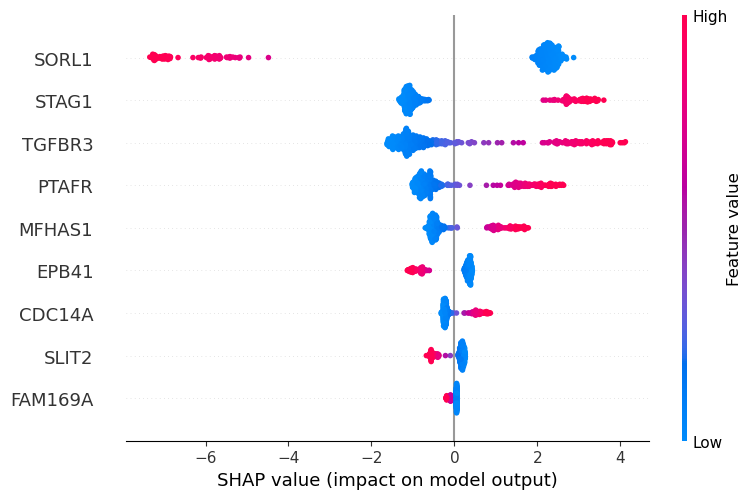

In [352]:
# # Assuming 'train_dfs_dict' and 'test_dfs_dict' are defined as before
# train_df = train_dfs_dict['train_hsa-mir-27a-3p']
# test_df = test_dfs_dict['test_hsa-mir-27a-3p']

# top_9_features = ['PTAFR', 'TGFBR3', 'FAM169A', 'EPB41', 'SLIT2', 'SORL1', 'STAG1', 'CDC14A', 'MFHAS1']

# X_train_top = train_df[top_9_features]
# y_train = train_df['LABEL']
# X_test_top = test_df[top_9_features]
# y_test = test_df['LABEL']

# # Standardizing the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_top)
# X_test_scaled = scaler.transform(X_test_top)

# # Define a logistic regression model
# lr = LogisticRegression(random_state=98, solver='liblinear', C=100, max_iter=5000)

# # Fit the logistic regression model
# lr.fit(X_train_scaled, y_train)

# # Make predictions
# y_pred_train = lr.predict(X_train_scaled)
# y_pred_test = lr.predict(X_test_scaled)

# # Calculate and print performance metrics
# train_accuracy = accuracy_score(y_train, y_pred_train)
# test_accuracy = accuracy_score(y_test, y_pred_test)
# train_f1 = f1_score(y_train, y_pred_train)
# test_f1 = f1_score(y_test, y_pred_test)

# print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
# print(f"Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}")

# # SHAP analysis
# # Initialize the SHAP Explainer
# explainer = shap.Explainer(lr, X_train_scaled)

# # Compute SHAP values
# shap_values = explainer.shap_values(X_train_scaled)

# # Summary plot
# shap.summary_plot(shap_values, X_train_scaled, feature_names=top_9_features)

# ML - Random Forest - on the SMOTED-d data

# GRAYED OUT BECAUSE I RE-RAN THE CODE ON non SMOTE-d DATA

In [329]:
# # Update the parameter grid as per the warning
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_features': ['sqrt', 'log2'],  # Updated as per FutureWarning guidance
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

In [330]:
# best_model_performance = {"f1": -np.inf}

# for train_key, train_df in train_dfs_dict.items():
#     test_key = "test_" + train_key.split("_")[-1]
#     test_df = test_dfs_dict[test_key]

#     X_train = train_df.iloc[:, :-1]
#     y_train = train_df['LABEL'].astype(int)

#     # Initialize the base model
#     base_model = RandomForestClassifier(random_state=98, n_jobs=-1)

#     # Setup the random search with 5-fold cross-validation
#     cv = StratifiedKFold(n_splits=5)
#     random_search = RandomizedSearchCV(estimator=base_model, param_distributions=param_grid,
#                                        n_iter=10, cv=cv, verbose=1, random_state=98, n_jobs=-1,
#                                        scoring='f1')

#     # Perform the random search to find the best hyperparameters
#     random_search.fit(X_train, y_train)

#     # Select the best model
#     best_model = random_search.best_estimator_

#     X_test = test_df.iloc[:, :-1]
#     y_test = test_df['LABEL'].astype(int)

#     y_pred = best_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     print(f"TRAINED ON - {train_key}")
#     print(f"TESTED ON - {test_key}")
#     print(f"ACCURACY - {accuracy:.4f}")
#     print(f"F1 SCORE - {f1:.4f}")
#     print(f"HYPERPARAMETERS - {random_search.best_params_}\n")

#     if f1 > best_model_performance["f1"]:
#         best_model_performance = {
#             "trained_on": train_key,
#             "tested_on": test_key,
#             "accuracy": accuracy,
#             "f1": f1,
#             "best_params": random_search.best_params_
#         }

# print("---BEST MODEL---")
# print(f"TRAINED ON - {best_model_performance['trained_on']}")
# print(f"TESTED ON - {best_model_performance['tested_on']}")
# print(f"ACCURACY - {best_model_performance['accuracy']:.4f}")
# print(f"F1 SCORE - {best_model_performance['f1']:.4f}")
# print(f"HYPERPARAMETERS - {best_model_performance['best_params']}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-1-3p
TESTED ON - test_hsa-mir-1-3p
ACCURACY - 0.5680
F1 SCORE - 0.7137
HYPERPARAMETERS - {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-16-5p
TESTED ON - test_hsa-mir-16-5p
ACCURACY - 0.5740
F1 SCORE - 0.7165
HYPERPARAMETERS - {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-124-3p
TESTED ON - test_hsa-mir-124-3p
ACCURACY - 0.6746
F1 SCORE - 0.7598
HYPERPARAMETERS - {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED

# ML - AdaBoost

# GRAYED OUT BECAUSE I RE-RAN THE CODE ON non SMOTE-d DATA

In [331]:
# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200, 300, 400],
#     'learning_rate': [0.01, 0.1, 1.0],
#     # Adjust for the renaming in the parameter grid
#     'estimator__max_depth': [1, 2, 3, 4, 5]
# }

In [332]:
# best_model_performance = {"f1": -np.inf}

# for train_key, train_df in train_dfs_dict.items():
#     test_key = "test_" + train_key.split("_")[-1]
#     test_df = test_dfs_dict[test_key]

#     X_train = train_df.iloc[:, :-1]
#     y_train = train_df['LABEL'].astype(int)

#     # Initialize the DecisionTreeClassifier as the estimator for AdaBoost
#     estimator = DecisionTreeClassifier(max_depth=1)
    
#     # Initialize the AdaBoost model with the DecisionTreeClassifier as the estimator
#     # Updated to use 'estimator' instead of 'base_estimator' following sklearn's future update
#     base_model = AdaBoostClassifier(estimator=estimator, random_state=98)

#     # Setup the random search with 5-fold cross-validation
#     cv = StratifiedKFold(n_splits=5)
#     random_search = RandomizedSearchCV(estimator=base_model, param_distributions=param_grid,
#                                        n_iter=10, cv=cv, verbose=1, random_state=98, n_jobs=-1,
#                                        scoring='f1')

#     # Perform the random search to find the best hyperparameters
#     random_search.fit(X_train, y_train)

#     # Select the best model
#     best_model = random_search.best_estimator_

#     X_test = test_df.iloc[:, :-1]
#     y_test = test_df['LABEL'].astype(int)

#     y_pred = best_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     print(f"TRAINED ON - {train_key}")
#     print(f"TESTED ON - {test_key}")
#     print(f"ACCURACY - {accuracy:.4f}")
#     print(f"F1 SCORE - {f1:.4f}")
#     print(f"HYPERPARAMETERS - {random_search.best_params_}\n")

#     if f1 > best_model_performance["f1"]:
#         best_model_performance = {
#             "trained_on": train_key,
#             "tested_on": test_key,
#             "accuracy": accuracy,
#             "f1": f1,
#             "best_params": random_search.best_params_
#         }

# print("---BEST MODEL---")
# print(f"TRAINED ON - {best_model_performance['trained_on']}")
# print(f"TESTED ON - {best_model_performance['tested_on']}")
# print(f"ACCURACY - {best_model_performance['accuracy']:.4f}")
# print(f"F1 SCORE - {best_model_performance['f1']:.4f}")
# print(f"HYPERPARAMETERS - {best_model_performance['best_params']}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-1-3p
TESTED ON - test_hsa-mir-1-3p
ACCURACY - 0.6331
F1 SCORE - 0.7207
HYPERPARAMETERS - {'n_estimators': 200, 'learning_rate': 1.0, 'estimator__max_depth': 4}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-16-5p
TESTED ON - test_hsa-mir-16-5p
ACCURACY - 0.6746
F1 SCORE - 0.6584
HYPERPARAMETERS - {'n_estimators': 400, 'learning_rate': 1.0, 'estimator__max_depth': 3}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-124-3p
TESTED ON - test_hsa-mir-124-3p
ACCURACY - 0.5858
F1 SCORE - 0.7222
HYPERPARAMETERS - {'n_estimators': 400, 'learning_rate': 1.0, 'estimator__max_depth': 3}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
TRAINED ON - train_hsa-mir-34a-5p
TESTED ON - test_hsa-mir-34a-5p
ACCURACY - 0.6154
F1 SCORE - 0.6948
HYPERPARAMETERS - {'n_estimators': 300, 'learning_rate': 1.0, 'estimator__max_depth'

# using XGBoost — with and without hyperparameter tuning - on SMOTE-d data

# GRAYED OUT BECAUSE I RE-RAN THE CODE ON non SMOTE-d DATA

In [333]:
# # Initialize performance tracking
# best_model_performance = {"f1": -np.inf}

# # Loop through each pair of training and testing datasets
# for train_key, train_df in train_dfs_dict.items():
#     test_key = "test_" + train_key.split("_")[-1]
#     test_df = test_dfs_dict[test_key]

#     # Prepare data
#     X_train = train_df.iloc[:, :-1].values
#     y_train = train_df['LABEL'].values
#     X_test = test_df.iloc[:, :-1].values
#     y_test = test_df['LABEL'].values

#     # Define the model pipeline
#     model_pipeline = Pipeline([
#         ('scaler', StandardScaler()),
#         ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=98))
#     ])

#     # Fit the model
#     model_pipeline.fit(X_train, y_train)

#     # Predictions
#     y_pred = model_pipeline.predict(X_test)

#     # Calculate performance metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     # Update best model if current model performs better
#     if f1 > best_model_performance["f1"]:
#         best_model_performance.update({
#             "trained_on": train_key,
#             "tested_on": test_key,
#             "accuracy": accuracy,
#             "f1": f1
#         })

#     # Print current model's performance
#     print(f"TRAINED ON - {train_key}")
#     print(f"TESTED ON - {test_key}")
#     print(f"ACCURACY - {accuracy:.4f}")
#     print(f"F1 SCORE - {f1:.4f}\n")

# # After looping through all dataframes, print details of the best performing model
# print("---BEST MODEL---")
# print(f"TRAINED ON - {best_model_performance['trained_on']}")
# print(f"TESTED ON - {best_model_performance['tested_on']}")
# print(f"ACCURACY - {best_model_performance['accuracy']:.4f}")
# print(f"F1 SCORE - {best_model_performance['f1']:.4f}")

TRAINED ON - train_hsa-mir-1-3p
TESTED ON - test_hsa-mir-1-3p
ACCURACY - 0.6450
F1 SCORE - 0.6907

TRAINED ON - train_hsa-mir-16-5p
TESTED ON - test_hsa-mir-16-5p
ACCURACY - 0.5917
F1 SCORE - 0.7184

TRAINED ON - train_hsa-mir-124-3p
TESTED ON - test_hsa-mir-124-3p
ACCURACY - 0.5562
F1 SCORE - 0.6032

TRAINED ON - train_hsa-mir-34a-5p
TESTED ON - test_hsa-mir-34a-5p
ACCURACY - 0.5858
F1 SCORE - 0.7222

TRAINED ON - train_hsa-let-7b-5p
TESTED ON - test_hsa-let-7b-5p
ACCURACY - 0.6982
F1 SCORE - 0.7733

TRAINED ON - train_hsa-mir-27a-3p
TESTED ON - test_hsa-mir-27a-3p
ACCURACY - 0.5799
F1 SCORE - 0.7078

TRAINED ON - train_hsa-mir-155-5p
TESTED ON - test_hsa-mir-155-5p
ACCURACY - 0.5621
F1 SCORE - 0.6942

TRAINED ON - train_hsa-mir-129-2-3p
TESTED ON - test_hsa-mir-129-2-3p
ACCURACY - 0.5858
F1 SCORE - 0.7222

TRAINED ON - train_hsa-mir-103a-3p
TESTED ON - test_hsa-mir-103a-3p
ACCURACY - 0.5976
F1 SCORE - 0.7258

TRAINED ON - train_hsa-mir-182-5p
TESTED ON - test_hsa-mir-182-5p
ACCURACY 

In [360]:
# best_model_performance = {"f1": -np.inf}

# for train_key, train_df in train_dfs_dict.items():
#     test_key = "test_" + train_key.split("_")[-1]
#     test_df = test_dfs_dict[test_key]

#     X_train = train_df.drop(columns=['LABEL']).values
#     y_train = train_df['LABEL'].values
#     X_test = test_df.drop(columns=['LABEL']).values
#     y_test = test_df['LABEL'].values

#     model_pipeline = Pipeline([
#         ('scaler', StandardScaler()),
#         ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=98))
#     ])

#     param_grid = {
#         'xgb__n_estimators': [50, 100, 150],
#         'xgb__learning_rate': [0.01, 0.1, 0.2],
#         'xgb__max_depth': [3, 4, 5],
#         'xgb__subsample': [0.8, 1.0],
#         'xgb__colsample_bytree': [0.8, 1.0],
#     }

#     # Adjust n_jobs to 1 to reduce parallelism and memory usage
#     grid_search = GridSearchCV(model_pipeline, param_grid=param_grid, scoring='f1', cv=5, verbose=1, n_jobs=1)

#     grid_search.fit(X_train, y_train)
#     best_model = grid_search.best_estimator_

#     y_pred = best_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     if f1 > best_model_performance["f1"]:
#         best_model_performance.update({
#             "trained_on": train_key,
#             "tested_on": test_key,
#             "accuracy": accuracy,
#             "f1": f1,
#             "best_params": grid_search.best_params_
#         })

#     print(f"TRAINED ON - {train_key}")
#     print(f"TESTED ON - {test_key}")
#     print(f"ACCURACY - {accuracy:.4f}")
#     print(f"F1 SCORE - {f1:.4f}")
#     print(f"BEST HYPERPARAMETERS - {grid_search.best_params_}\n")

# print("---BEST MODEL---")
# print(f"TRAINED ON - {best_model_performance['trained_on']}")
# print(f"TESTED ON - {best_model_performance['tested_on']}")
# print(f"ACCURACY - {best_model_performance['accuracy']:.4f}")
# print(f"F1 SCORE - {best_model_performance['f1']:.4f}")
# print(f"BEST HYPERPARAMETERS - {best_model_performance['best_params']}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
TRAINED ON - train_hsa-mir-1-3p
TESTED ON - test_hsa-mir-1-3p
ACCURACY - 0.6213
F1 SCORE - 0.6735
BEST HYPERPARAMETERS - {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 3, 'xgb__n_estimators': 150, 'xgb__subsample': 1.0}

Fitting 5 folds for each of 108 candidates, totalling 540 fits
TRAINED ON - train_hsa-mir-16-5p
TESTED ON - test_hsa-mir-16-5p
ACCURACY - 0.7515
F1 SCORE - 0.7835
BEST HYPERPARAMETERS - {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 3, 'xgb__n_estimators': 150, 'xgb__subsample': 0.8}

Fitting 5 folds for each of 108 candidates, totalling 540 fits
TRAINED ON - train_hsa-mir-124-3p
TESTED ON - test_hsa-mir-124-3p
ACCURACY - 0.5799
F1 SCORE - 0.5848
BEST HYPERPARAMETERS - {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 5, 'xgb__n_estimators': 150, 'xgb__subsample': 0.8}

Fitting 5 folds for each of 108 candidates, totalling 5